# Data Preprocessing & Visualization 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's load the dataset of Top 1000 Movies from IMDb directly from the URL.

In [2]:
url = " https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv"
df = pd.read_csv(url)

Understanding the structure of the dataset is key before diving into analysis.
- Check the data types of each column.
- Count non-null values.
- Look at the first few rows.

In [3]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head(30))

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None

First 5 rows:

A quick glance at summary statistics helps us understand numerical distributions, potential outliers, and missing values.

In [4]:
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Summary Statistics:
       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06

Missing Values:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


# 1.1 Handling Missing Values
We'll use two different strategies:

- For Certificate : Fill with mode -> This is a categorical column (movie ratings like "A", "UA", "U").
 Strategy : We can fill missing values with the mode (most frequent value) since ratings are typically limited categories.

- For Meta_score : Fill with median -> This is a numerical score.
Strategy: Since it's continuous, we can fill missing values with the median (less affected by outliers)

- For Gross : Remove the Nan Values


✅ Reasons to delete the rows with Nan in Gross:

 - Keeps only complete and reliable data.
 - Prevents introducing artificial values (especially if Gross is crucial for analysis).
 - Useful if you plan to perform financial modeling or revenue-based predictions.

Approach:

- Fill Certificate with mode.
- Fill Meta_score with median (since it has outliers).
- Delete Nan values from Gross

 Why these strategies?
 
  -- The mode works well for categorical values since it's the most common rating.

  -- The median is robust to outliers, making it better than the mean for numerical data.

In [4]:
print(df['Gross'].isna().sum())  # Count NaNs


169


In [5]:
# For Certificate
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])

# Ensure 'Gross' is a string 
df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df = df.dropna(subset=['Gross'])  # Reassign the result

# For Meta_score
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())
df = df.reset_index(drop=True)


In [6]:
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Summary Statistics:
       IMDB_Rating  Meta_score   No_of_Votes         Gross
count   831.000000  831.000000  8.310000e+02  8.310000e+02
mean      7.946931   77.512635  3.152499e+05  6.803475e+07
std       0.283204   11.869756  3.436443e+05  1.097500e+08
min       7.600000   28.000000  2.508800e+04  1.305000e+03
25%       7.700000   71.000000  7.143000e+04  3.253559e+06
50%       7.900000   78.000000  1.867340e+05  2.353089e+07
75%       8.100000   85.500000  4.457210e+05  8.075089e+07
max       9.300000  100.000000  2.343110e+06  9.366622e+08

Missing Values:
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [7]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 15 rows:")



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    object 
 3   Certificate    831 non-null    object 
 4   Runtime        831 non-null    object 
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     831 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 104.0+ KB
None

First 15 rows:

Along the document we can see some data types & inconsistencies and we have to clean them:


# Justification and Explanation for Fixing Data Types & Inconsistencies

### 1. Fixing the Data Type for 'Released_Year':

**Explanation:**
- **Objective**: Convert the Released_Year column into a numeric type while handling any invalid values (non-numeric).
  
**Justification:**
- This step ensures that the Released_Year column is converted to a numeric format that can be used for numerical operations or analysis.
- It handles non-numeric or erroneous data by converting them to `NaN` without causing errors in the dataset.

---

### 2. Fixing the Data Type and Extracting Numerical Values from 'Runtime':


**Explanation:**
- **Objective**: Clean the `Runtime` column to ensure it contains only the numerical part (minutes) of the runtime and convert it to a floating-point type.

**Justification:**
- This step is important for ensuring that the Runtime column contains only numerical values (in minutes), extracted from potentially inconsistent text entries.
- By using regular expressions and converting the data type to float, we make the column suitable for further analysis, like computing averages or creating visualizations.

---

### 3. Cleaning and Standardizing the 'Certificate' Column:

**Explanation:**
- **Objective**: Clean the Certificate column by removing unnecessary spaces and ensuring that all entries are in uppercase.
  
**Justification:**
- This step ensures that the Certificate column is standardized by removing any extra spaces and converting everything to uppercase.
- By making all values uniform, it improves data consistency and helps avoid discrepancies during analysis (e.g., where "PG" and "pg" would be treated as different values).

---

### 4. Handling Missing Values in 'Released_Year':

**Explanation:**
- **Objective**: Fill missing values (NaN) in the Released_Year column with the median value of the column.
  
**Justification:**
- This step ensures that there are no missing values in the Released_Year column, which could lead to issues in subsequent analysis or visualizations.
- By using the median, we prevent the filling of missing values with an arbitrary number (which could distort the analysis) and instead use a representative value from the data itself.

---

### Overall Justification:
The main goal of these steps is to ensure that the dataset is clean, consistent, and ready for analysis. Here's why these steps are important:
1. **Data Consistency**: Standardizing columns (like Certificate and Released_Year) ensures that the dataset can be analyzed effectively without errors caused by inconsistent data formats.
2. **Handling Missing or Erroneous Data**: Coercing non-numeric values and filling missing data (with median or other strategies) ensures that missing or erroneous data points don't interrupt your analysis.
3. **Data Type Conversion**: Ensuring that each column has the appropriate data type  is crucial for performing numerical operations and making the data usable for model building, statistical analysis, or visualization.


In [8]:
#Fixing Data Type & Inconsistencies
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce').astype('Int64')
df['Runtime'] = df['Runtime'].astype(str).str.extract(r'(\d+)').astype(float)  
df['Certificate'] = df['Certificate'].str.strip().str.upper()
df['Released_Year'] = df['Released_Year'].fillna(df['Released_Year'].median())

In [9]:
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Summary Statistics:
       Released_Year     Runtime  IMDB_Rating  Meta_score   No_of_Votes  \
count          831.0  831.000000   831.000000  831.000000  8.310000e+02   
mean     1993.925391  124.078219     7.946931   77.512635  3.152499e+05   
std        21.136087   27.501455     0.283204   11.869756  3.436443e+05   
min           1921.0   45.000000     7.600000   28.000000  2.508800e+04   
25%           1984.0  104.000000     7.700000   71.000000  7.143000e+04   
50%           2000.0  120.000000     7.900000   78.000000  1.867340e+05   
75%           2010.0  138.000000     8.100000   85.500000  4.457210e+05   
max           2019.0  242.000000     9.300000  100.000000  2.343110e+06   

              Gross  
count  8.310000e+02  
mean   6.803475e+07  
std    1.097500e+08  
min    1.305000e+03  
25%    3.253559e+06  
50%    2.353089e+07  
75%    8.075089e+07  
max    9.366622e+08  

Missing Values:
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime     

In [152]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 15 rows:")
print(df.head(30))

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    Int64  
 3   Certificate    831 non-null    object 
 4   Runtime        831 non-null    float64
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     831 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    float64
dtypes: Int64(1), float64(4), int64(1), object(10)
memory usage: 104.8+ KB
None

Firs

# Checking for Outliers

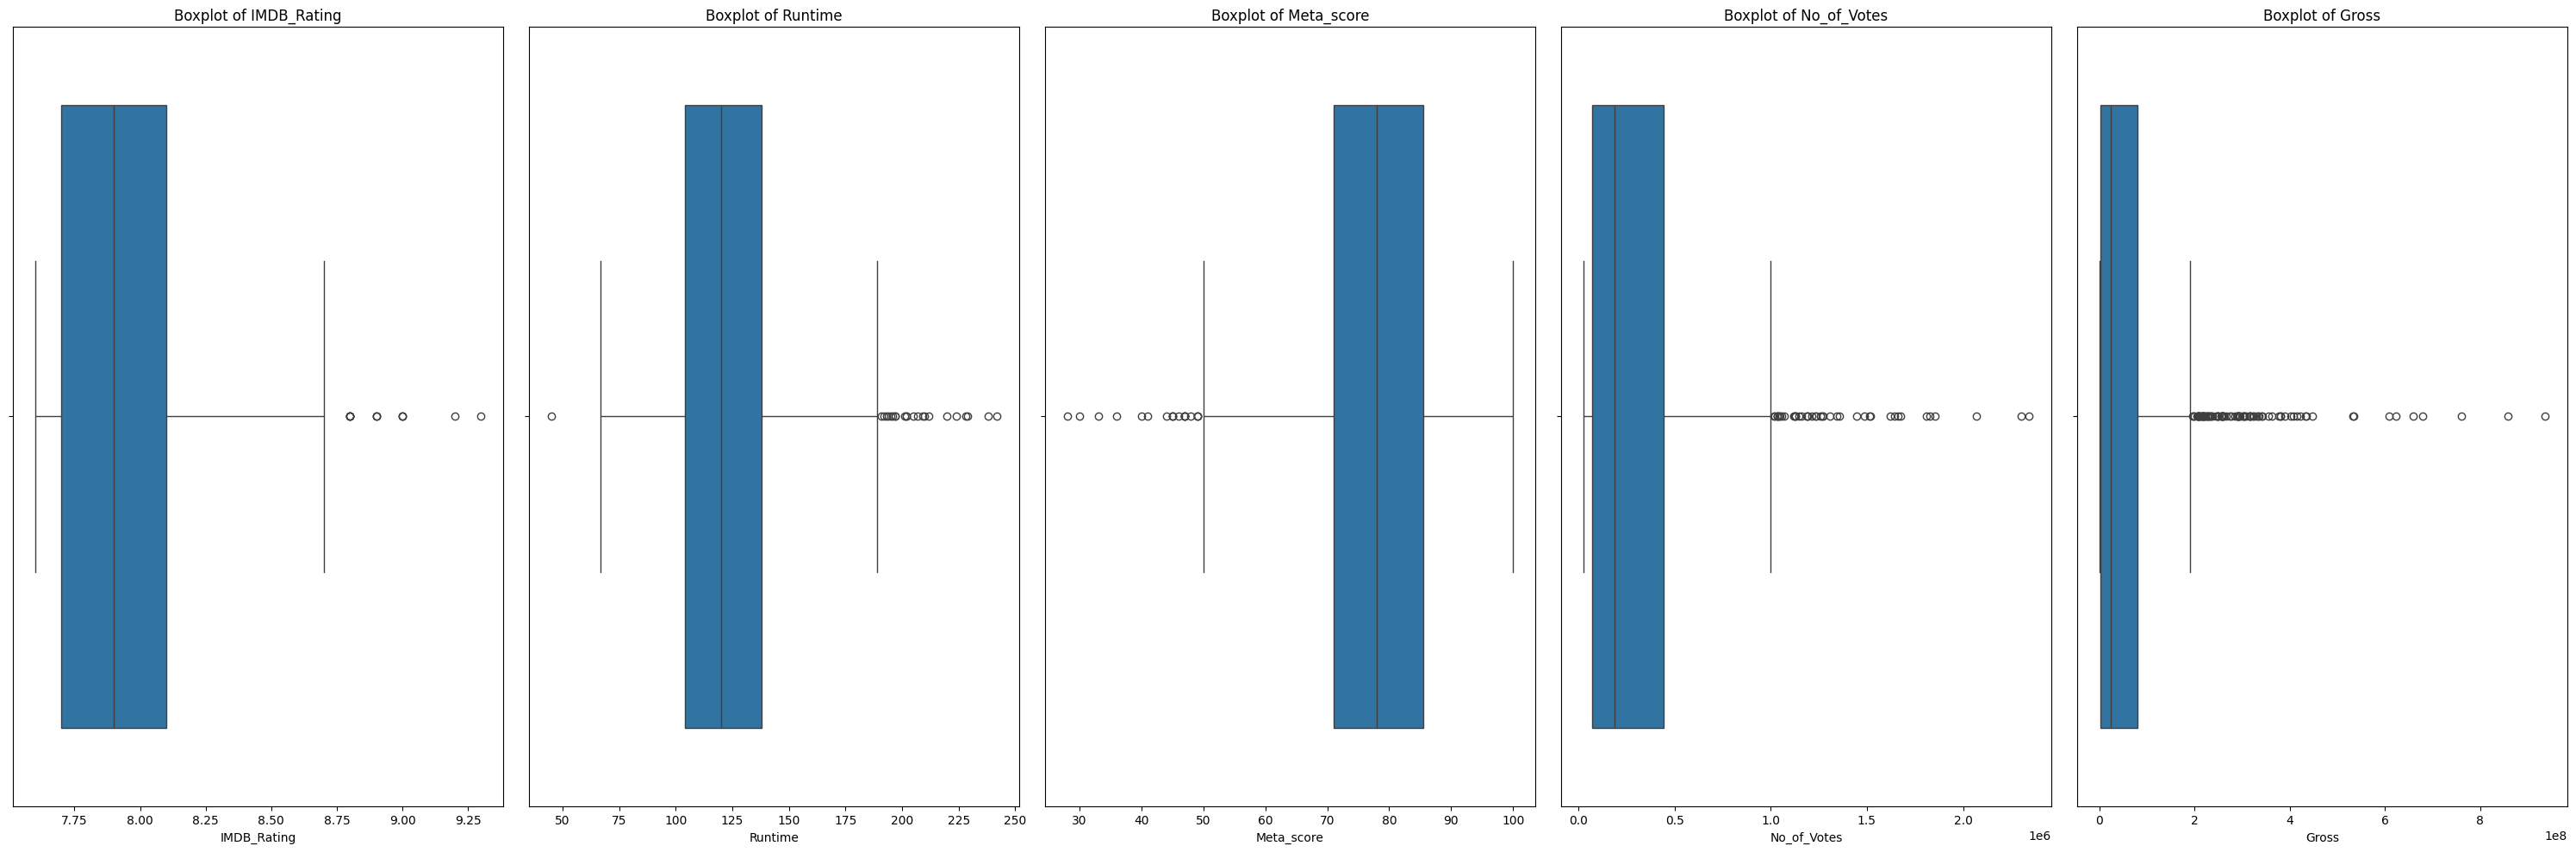

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to visualize
columns = ['IMDB_Rating','Runtime', 'Meta_score', 'No_of_Votes','Gross']

# Set up the figure size
plt.figure(figsize=(30, 10))

# Create a boxplot for each column
for i, col in enumerate(columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


 - We can see that we have some outliers according to the box plots above 

In [11]:


#3. Fixing outliers using the iqr method
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)  # Replace outliers

outlier_columns = ['Meta_score', 'No_of_Votes','Gross','Runtime']
for col in outlier_columns:
    remove_outliers(col)



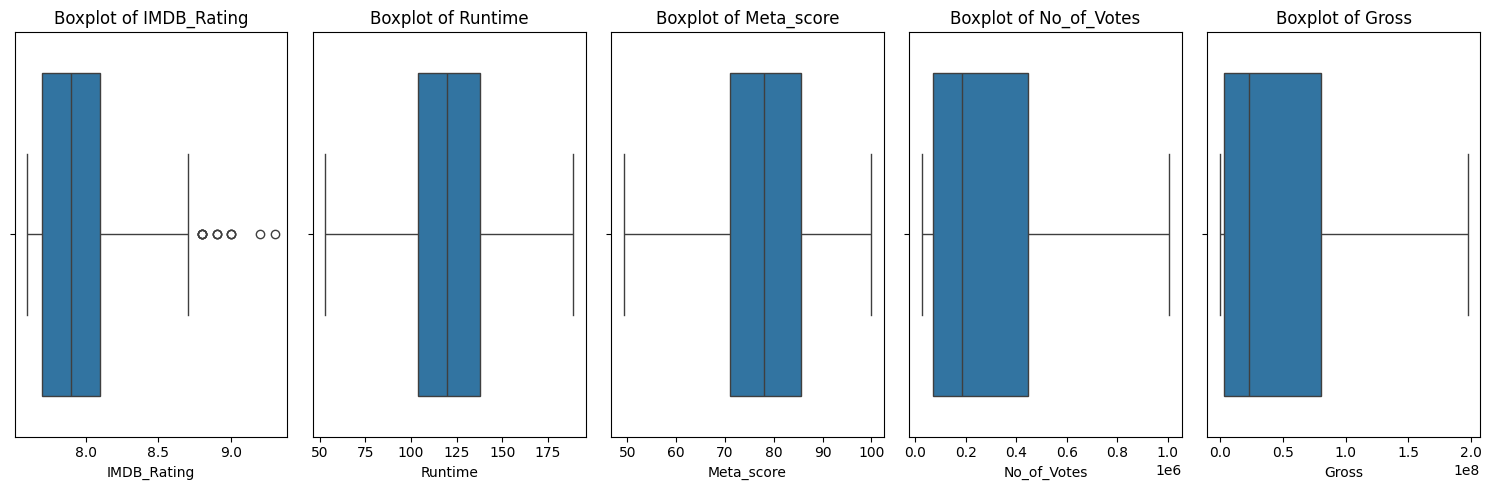

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to visualize
columns = ['IMDB_Rating','Runtime', 'Meta_score', 'No_of_Votes','Gross']

# Set up the figure size
plt.figure(figsize=(15, 5))

# Create a boxplot for each column
for i, col in enumerate(columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()



 - We can see that after we use the IQR we fix the problem with outliers

# 1.2 Data Transformation - Normalize or standardize numerical features where necessary

1. Normalization vs. Standardization

Normalization :(Min-Max Scaling): Scales values between 0 and 1. Good for cases where we want to preserve relationships and keep everything within a range.

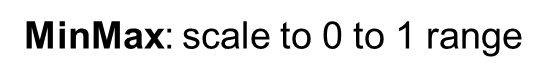

Standardization (Z-Score Scaling): Centers data around mean 0 with standard deviation 1. Good for normally distributed data.

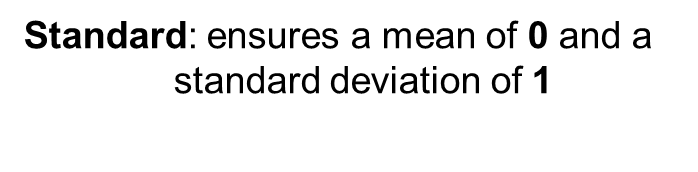


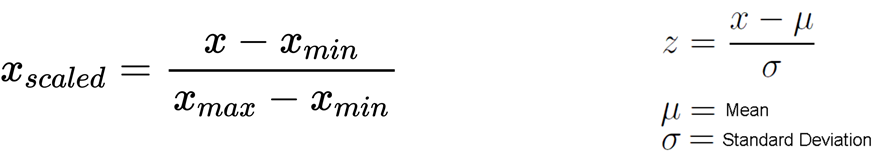
 
2. Choosing the Right Transformation
Looking at the box plot above and to the plots below and using the course support we can see that:
 - IMDB_Rating is a Normal transformation but we don't need a transformation for this
 - Meta_score is a Uniform transformation
 - Runtime is a Normal transformation but we don't need a transformation for this
 - No_of_Votes and Gross are Right-skewed transformations

3. Apply Transformation
 - Standardization (Z-score normalization) for normally distributed data.
 - Min-Max Normalization for skewed data.

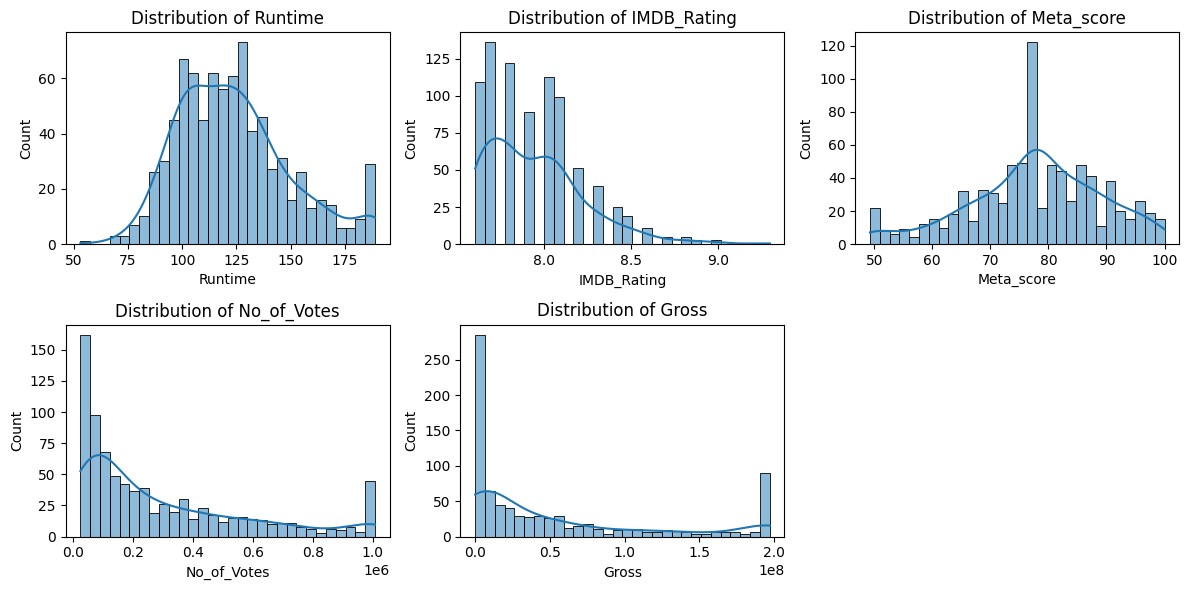

In [13]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Select numerical columns
num_cols = ["Runtime", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]

# Plot distributions
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'No_of_Votes'}>,
        <Axes: title={'center': 'Gross'}>]], dtype=object)

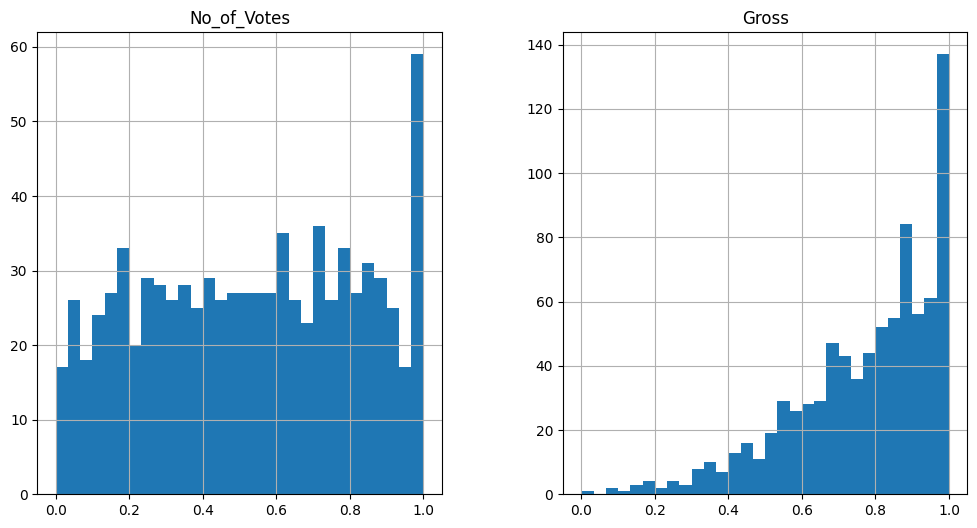

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Select numerical columns
num_cols = [ "No_of_Votes","Gross"]

# Apply log transformation to highly skewed features
df["No_of_Votes"] = np.log1p(df["No_of_Votes"])  # log1p to avoid log(0) issues
df["Gross"] = np.log1p(df["Gross"])
# Initialize scalers
minmax_scaler = MinMaxScaler()

# Apply MinMax Scaling to skewed features
df[["No_of_Votes", "Gross"]] = minmax_scaler.fit_transform(df[["No_of_Votes", "Gross"]])

# Check transformed distributions
df[num_cols].hist(figsize=(12, 6), bins=30)


In [15]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 15 rows:")
print(df.head(10))

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    Int64  
 3   Certificate    831 non-null    object 
 4   Runtime        831 non-null    float64
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     831 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    float64
 15  Gross          831 non-null    float64
dtypes: Int64(1), float64(5), object(10)
memory usage: 104.8+ KB
None

First 15 rows:

Since Genre is a categorical column that contains multiple values separated by commas (e.g., "Action, Adventure, Sci-Fi"), the best approach for encoding it would be multi-label one-hot encoding. This method ensures that each unique genre gets its own binary column, and a movie can have multiple genres marked as 1 where applicable.

Here’s how we can do it:

-- Steps:
 - Split the genre column into multiple categories.
 - Use One-Hot Encoding to create separate binary columns for each genre.

In [15]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


# Step 1: Check if 'Genre' is a string and split it into lists of genres
df['Genre'] = df['Genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Step 2: Apply MultiLabelBinarizer to create binary columns for each genre
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['Genre'])

# Step 3: Create a DataFrame with the binary columns for each genre
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

# Step 4: Concatenate the original DataFrame with the new binary columns for genres
df = pd.concat([df, genre_df], axis=1)

# Step 5: Drop the original 'Genre' column if no longer needed (optional)
df = df.drop(columns=['Genre'])


In [16]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 15 rows:")
print(df.head(50))

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    Int64  
 3   Certificate    831 non-null    object 
 4   Runtime        831 non-null    float64
 5   IMDB_Rating    831 non-null    float64
 6   Overview       831 non-null    object 
 7   Meta_score     831 non-null    float64
 8   Director       831 non-null    object 
 9   Star1          831 non-null    object 
 10  Star2          831 non-null    object 
 11  Star3          831 non-null    object 
 12  Star4          831 non-null    object 
 13  No_of_Votes    831 non-null    float64
 14  Gross          831 non-null    float64
 15  Action         831 non-null    int64  
 16  Adventure      831 non-null    int64  
 17  Animation      831 non-null    int64

# Feature Scaling

Feature scaling is a technique used to standardize the range of independent variables or features of data. In datasets with variables of different scales, scaling is crucial because certain machine learning algorithms can perform poorly or be biased toward certain features if the scales are not uniform. Feature scaling can help:

 -  If a feature has a much larger scale (e.g., "Runtime" measured in minutes compared to "IMDB Rating" on a 1-10 scale), algorithms can focus too much on the larger-scale feature, leading to biased results.

 - Improve convergence: Algorithms like gradient descent converge faster if all the features are scaled similarly, as the learning rate will be more consistent across dimensions.

 - Ensure fairness: Feature scaling ensures that no single feature disproportionately influences model results due to its scale.

# Types of Scaling
- Min-Max Scaling (Normalization): Rescales the features to a fixed range, typically [0, 1] or [-1, 1].

  -- When to use: This method is suitable when the dataset does not have outliers, or when all features need to be transformed to the same scale.
- Standardization (Z-score Normalization): Rescales data so that it has a mean of 0 and a standard deviation of 1.

  -- When to use: Useful when the data has outliers or when a Gaussian distribution is assumed. It also works well for algorithms that assume normally distributed data.

  
# Feature Scaling in our Dataset

- Continuous features (e.g., "Runtime", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"):

  --These features should be scaled since their ranges differ significantly. For example, "Runtime" could be in the hundreds of minutes, while "IMDB_Rating" is between 1 and 10.
  
  --we can use Standardization  : 
- Binary features (e.g., "Action", "Adventure", "Animation", etc. — represented by 0s and 1s):
 
  --These features are already scaled, as they are binary (0 or 1), so no scaling is required for these.
  
- Categorical features (e.g., "Certificate", "Director", "Star1", "Star2", etc.):

  --These categorical variables need to be encoded using techniques like One-Hot Encoding or Label Encoding.
  
  --After encoding, the resulting binary features (for one-hot encoding) may need scaling, though in many cases, they are not scaled.

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting continuous columns for scaling
continuous_columns = ['No_of_Votes', 'Gross']

# Initialize the scaler (StandardScaler or MinMaxScaler)
scaler = StandardScaler() 

# Apply scaling to the continuous columns
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])
df['Meta_score'] = df['Meta_score'] / 10

# View the first few rows of the scaled data
print(df.head())


                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title  Released_Year Certificate  Runtime  IMDB_Rating  \
0  The Shawshank Redemption           1994           A    142.0          9.3   
1             The Godfather           1972           A    175.0          9.2   
2           The Dark Knight           2008          UA    152.0          9.0   
3    The Godfather: Part II           1974           A    189.0          9.0   
4              12 Angry Men           1957           U     96.0          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...         8.0   
1  An organized crime dynasty's aging patriarc

# Data Reduction

## 1. Improved Performance:
- Reduced Overfitting: By eliminating unnecessary or irrelevant features, the model can focus on the most important variables, reducing the chances of overfitting. Overfitting occurs when a model becomes too complex and starts to capture noise in the data rather than the actual patterns.
- Faster Training and Prediction: Fewer features mean less data for the algorithm to process. This leads to faster training times and quicker predictions, which is especially useful for large datasets or real-time applications.
- Reduced Computational Cost: Less data results in lower memory usage and reduces the computational resources required for training, allowing the model to run more efficiently on large-scale datasets.
- Increased Generalization: By focusing on the most relevant features, the model is more likely to generalize better to new, unseen data, improving its ability to make accurate predictions on out-of-sample data.
## 2. Improved Interpretability:
- Simplified Models: Fewer features lead to simpler models, making it easier to understand how the model is making predictions. This is particularly important in fields like healthcare or finance, where interpretability is crucial for decision-making and regulatory compliance.
- Enhanced Feature Importance Understanding: By reducing the number of features, you can more clearly identify the most influential variables. This allows you to focus on the key drivers of predictions, providing insights into the underlying relationships in the data.
- Easier Debugging and Maintenance: A simpler, reduced feature set means fewer opportunities for error, making it easier to debug and maintain the model over time.
## 3. Justification for Dropping Features:
- Irrelevant Features: Features that do not contribute meaningfully to the prediction can introduce noise. For example, Poster_Link is not likely to provide any predictive power for the task at hand (e.g., movie ratings, genre prediction). Removing such columns makes the model leaner and more focused.
- Redundancy: If certain features are highly correlated or redundant, they may not add new information. Dropping one of the redundant features can simplify the model without sacrificing predictive power.
- Domain Knowledge: Often, based on domain expertise, certain features may be identified as unnecessary for the model's goals. For example, a column like Poster_Link may be identified as irrelevant for predicting ratings or genre.

We remove the linl because is a garbage data in the dataset, we can't use it 

In [18]:
df = df.drop(columns=['Poster_Link'])

In [19]:
print(df.head(20))

                                         Series_Title  Released_Year  \
0                            The Shawshank Redemption           1994   
1                                       The Godfather           1972   
2                                     The Dark Knight           2008   
3                              The Godfather: Part II           1974   
4                                        12 Angry Men           1957   
5       The Lord of the Rings: The Return of the King           2003   
6                                        Pulp Fiction           1994   
7                                    Schindler's List           1993   
8                                           Inception           2010   
9                                          Fight Club           1999   
10  The Lord of the Rings: The Fellowship of the Ring           2001   
11                                       Forrest Gump           1994   
12                    Il buono, il brutto, il cattivo           

- t-SNE is a non-linear dimensionality reduction technique mainly used for visualizing high-dimensional data. Unlike PCA, which preserves global structure, t-SNE is better at clustering similar points together in lower-dimensional space.

- This creates a scatter plot of the 2D projection, where:

  - Movies with similar genre profiles are closer together.
    
  - Movies with very different genres are further apart.


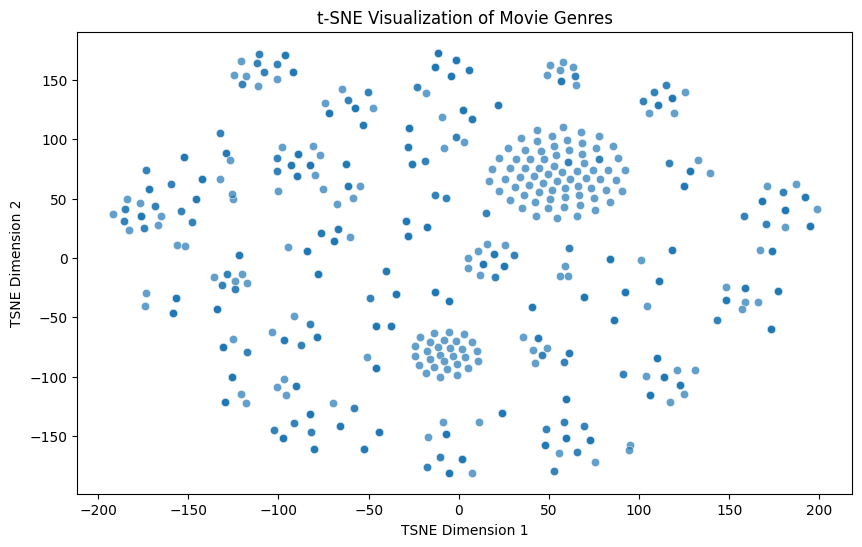

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

genre_columns = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy','Film-Noir','History','Horror', 'Music', 'Musical', 'Mystery', 'Romance', 
                  'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']
genres = df[genre_columns]

# Standardizing data (t-SNE works better with scaled data)
scaler = StandardScaler()
genres_scaled = scaler.fit_transform(genres)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # Reduce to 2D
genres_tsne = tsne.fit_transform(genres_scaled)

# Convert to DataFrame
df['TSNE_1'] = genres_tsne[:, 0]
df['TSNE_2'] = genres_tsne[:, 1]

# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TSNE_1'], y=df['TSNE_2'], alpha=0.7)
plt.title("t-SNE Visualization of Movie Genres")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.show()


In [88]:
print(df.head(20))


                                         Series_Title  Released_Year  \
0                            The Shawshank Redemption           1994   
1                                       The Godfather           1972   
2                                     The Dark Knight           2008   
3                              The Godfather: Part II           1974   
4                                        12 Angry Men           1957   
5       The Lord of the Rings: The Return of the King           2003   
6                                        Pulp Fiction           1994   
7                                    Schindler's List           1993   
8                                           Inception           2010   
9                                          Fight Club           1999   
10  The Lord of the Rings: The Fellowship of the Ring           2001   
11                                       Forrest Gump           1994   
12                    Il buono, il brutto, il cattivo           

# Interpreting the PCA Components
- Genre_PC1 & Genre_PC2 represent combinations of genres rather than individual genres.
- Movies with similar genre compositions will cluster together in the scatter plot.
 - For example:
    --Action & Thriller movies may group in one area.
    --Romantic & Musical films may be closer to each other.


               Series_Title  Released_Year Certificate  Runtime  IMDB_Rating  \
0  The Shawshank Redemption           1994           A    142.0          9.3   
1             The Godfather           1972           A    175.0          9.2   
2           The Dark Knight           2008          UA    152.0          9.0   
3    The Godfather: Part II           1974           A    189.0          9.0   
4              12 Angry Men           1957           U     96.0          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...         8.0   
1  An organized crime dynasty's aging patriarch t...        10.0   
2  When the menace known as the Joker wreaks havo...         8.4   
3  The early life and career of Vito Corleone in ...         9.0   
4  A jury holdout attempts to prevent a miscarria...         9.6   

               Director           Star1           Star2  ...     Gross  \
0        Frank Darabont     Tim Robb

C:\Users\Pop Paul\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


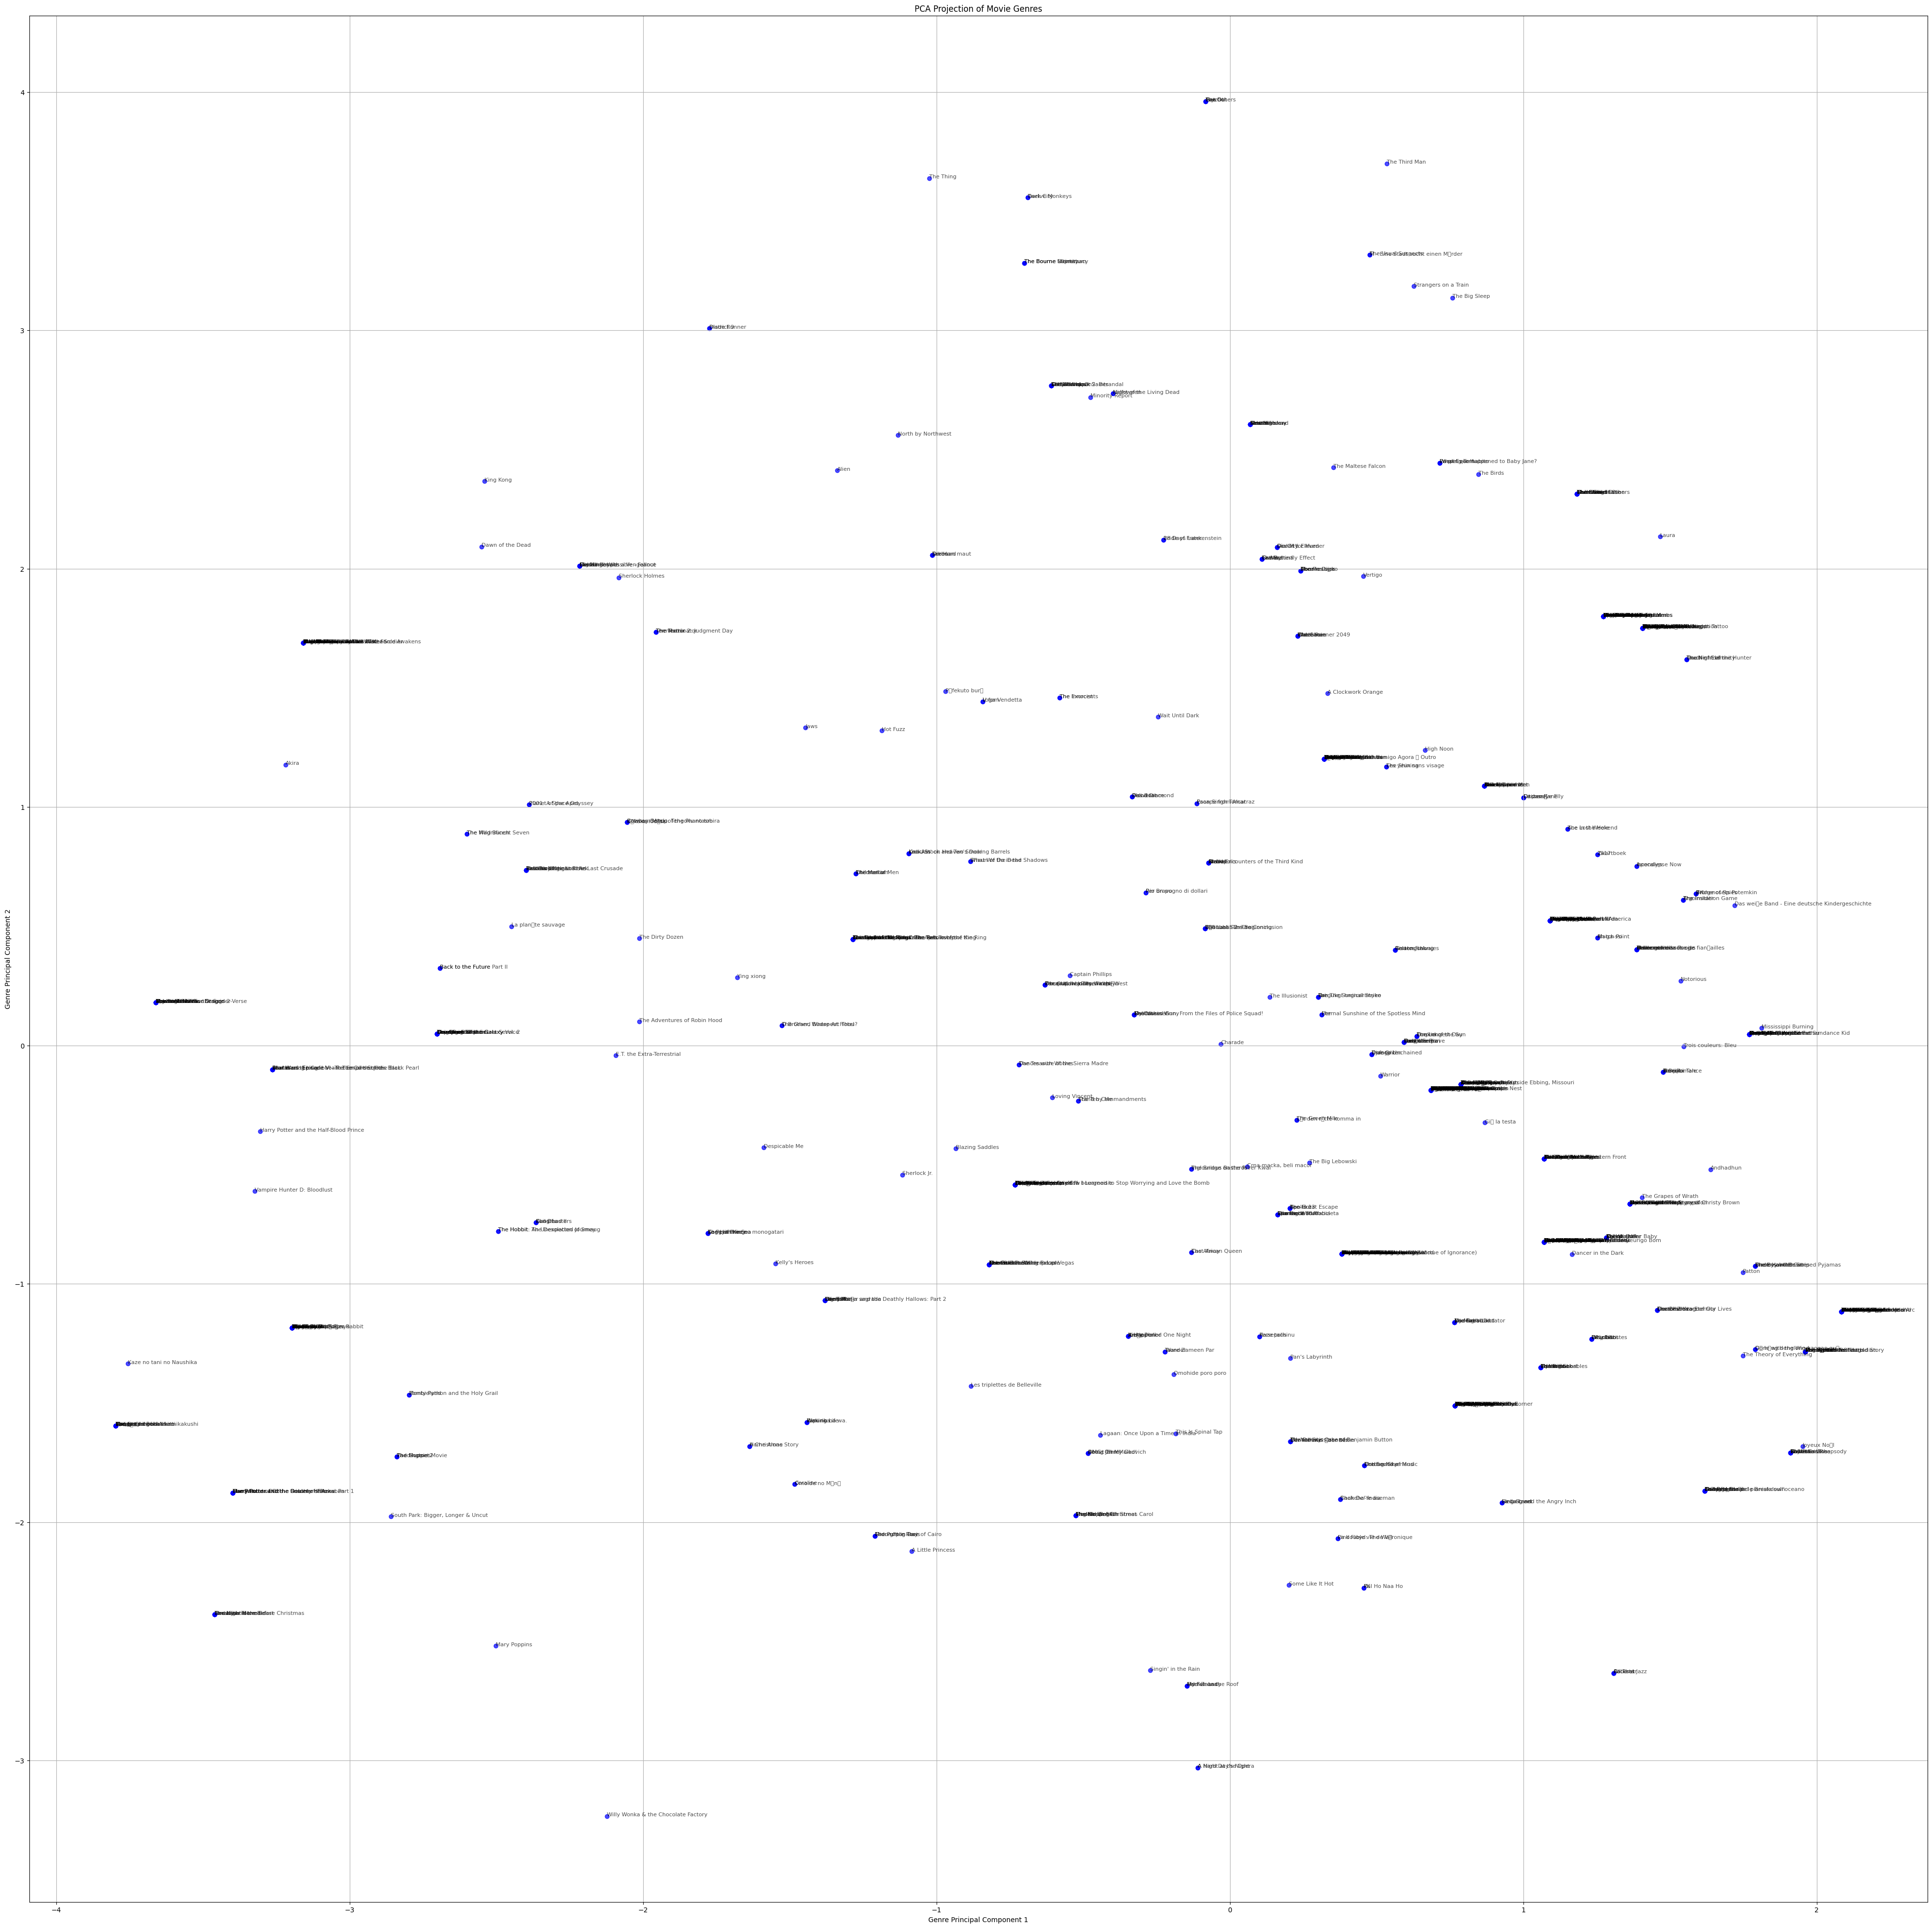

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only the genre columns 
genre_features = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy','Film-Noir','History','Horror', 'Music', 'Musical', 'Mystery', 'Romance', 
                  'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

df_genres = df[genre_features]

# Standardize 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_genres)

# Apply PCA to reduce dimensions 
pca = PCA(n_components=2)
genre_pca_result = pca.fit_transform(df_scaled)

# Create a new DataFrame with PCA results
df_genre_pca = pd.DataFrame(genre_pca_result, columns=['Genre_PC1', 'Genre_PC2'])
df_genre_pca['Series_Title'] = df['Series_Title']

# Merge PCA results with the original dataset
df_reduced = df.copy()
df_reduced.drop(columns=genre_features, inplace=True)  # Remove original genre columns
df_reduced = df_reduced.merge(df_genre_pca, on='Series_Title')  # Add PCA genre features

# Display dataset with PCA genre components
print(df_reduced.head())

# Visualize PCA Genre Clustering
plt.figure(figsize=(50,50))
plt.scatter(df_genre_pca['Genre_PC1'], df_genre_pca['Genre_PC2'], alpha=0.7, c='blue')

# Add movie labels
for i, row in df_genre_pca.iterrows():
    plt.text(row['Genre_PC1'], row['Genre_PC2'], row['Series_Title'], fontsize=8, alpha=0.7)

plt.xlabel('Genre Principal Component 1')
plt.ylabel('Genre Principal Component 2')
plt.title('PCA Projection of Movie Genres')
plt.grid()
plt.show()
# Overwrite the original dataframe (optional, if you want to modify df)
df = df_reduced.copy()

# Save to a new CSV file if needed
df.to_csv('modified_dataset.csv', index=False)


# Effect of PCA on Binary-Encoded Genres
- Identifies Genre Combinations: Instead of treating genres separately (e.g., Action, Comedy, Drama), PCA can combine correlated genres into new components (e.g., "Action-Thriller" or "Romantic-Musical").
- Reduces Feature Space: Instead of 10+ genre columns, PCA can create just 2-3 principal components, summarizing genre diversity in fewer dimensions.
- Preserves Similarity: Movies with similar genre patterns will be closer in PCA space.
- Removes Redundancy: Many movies belong to multiple genres (e.g., "Action-Thriller"), and PCA captures these patterns.

# Feature Engineering

- We could normalize the IMDB ratings to scale them between 0 and 1 for better comparison across different films, as the ratings might vary significantly.

In [20]:
df['Normalized_IMDB_Rating'] = (df['IMDB_Rating'] - df['IMDB_Rating'].min()) / (df['IMDB_Rating'].max() - df['IMDB_Rating'].min())


- We could create a new feature that combines the IMDB rating and Meta score into a weighted average, giving more weight to one or the other depending on domain knowledge. This could provide a better view of a movie's overall quality.

In [21]:
df['Combined_Score'] = 0.7 * df['IMDB_Rating'] + 0.3 * df['Meta_score']


- Calculate the age of the movie from its release year. This can help in understanding the time effect on the popularity or quality of movies

In [22]:
df['Movie_Age'] = 2025 - df['Released_Year']  # Assuming 2025 is the current year

- Director Popularity : Count how many movies each director has in the dataset.

In [23]:
df["Director_Movie_Count"] = df.groupby("Director")["Series_Title"].transform("count")

- Convert IMDB rating into categories for easy analysis.

In [24]:
def categorize_rating(rating):
    if rating >= 9:
        return "Excellent"
    elif rating >= 8:
        return "Good"
    elif rating >= 7:
        return "Average"
    else:
        return "Poor"

df["IMDB_Category"] = df["IMDB_Rating"].apply(categorize_rating)


 - Rationale Behind Feature Engineering Choices
  
   - Normalized IMDB Rating: This allows for easier comparison between movies, especially when models are trained. It helps mitigate the bias caused by absolute rating scale differences.
  
   - Combined Score: By combining the IMDB Rating and Meta score, we leverage two different sources of ratings and combine them into one to get a more robust measure of quality.
  
   - Movie Age: This feature captures the movie's age, which could have an impact on its relevance in the current cultural context. Older movies might have more nostalgic value, while newer ones could be more in line with current tastes.
  
   - Director Popularity:Directors with a strong track record often influence a movie’s success.
  
   -  IMDB Score Category: Human perception often thinks in qualitative terms ("Excellent," "Good," etc.). Categorization can help in classification models or audience sentiment analysis
  

In [29]:
print(df.head(20))
print(df.info())
print(df.isnull().sum())

                                         Series_Title  Released_Year  \
0                            The Shawshank Redemption           1994   
1                                       The Godfather           1972   
2                                     The Dark Knight           2008   
3                              The Godfather: Part II           1974   
4                                        12 Angry Men           1957   
5       The Lord of the Rings: The Return of the King           2003   
6                                        Pulp Fiction           1994   
7                                    Schindler's List           1993   
8                                           Inception           2010   
9                                          Fight Club           1999   
10  The Lord of the Rings: The Fellowship of the Ring           2001   
11                                       Forrest Gump           1994   
12                    Il buono, il brutto, il cattivo           

In [30]:
import pandas as pd

# Assuming 'df' is your DataFrame
df.to_csv("imdb_top_1000.csv", index=False)

- We use here correlation analysis to validate the impact of new features and as we see the corelations between the features vary from feature to feature
  
- Correlation Heatmap: The heatmap visually shows how each feature correlates with each other. For example:

  - If IMDB_Rating is highly correlated with Combined_Score, we might infer that the Combined Score is a strong predictor of the IMDB Rating.

  - Darker colors indicate stronger correlations (either positive or negative), while lighter colors indicate weaker correlations.
 
  - This gives a quick overview of how each selected feature relates to IMDB_Rating. Positive values indicate a positive correlation (as the feature increases, the IMDB rating increases) and negative values indicate the opposite

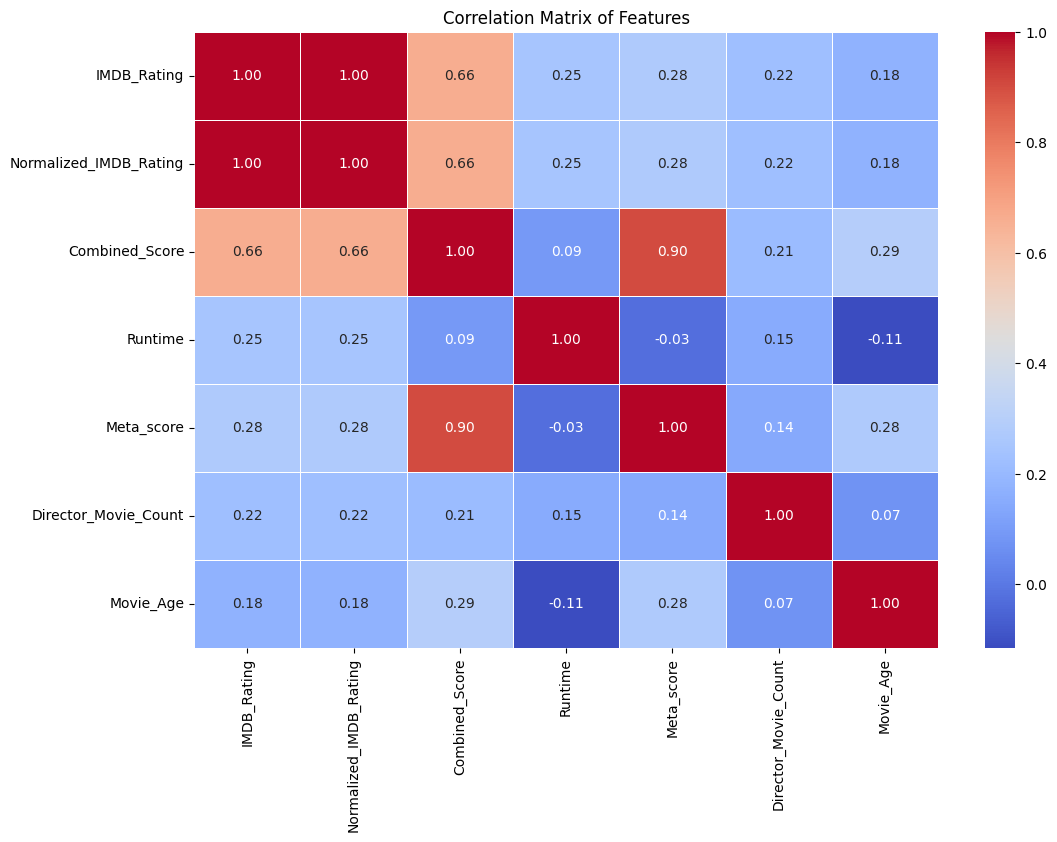

IMDB_Rating               1.000000
Normalized_IMDB_Rating    1.000000
Combined_Score            0.664196
Runtime                   0.249071
Meta_score                0.276272
Director_Movie_Count      0.220581
Movie_Age                 0.175272
Name: IMDB_Rating, dtype: float64


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation (numerical ones)
correlation_columns = [
    'IMDB_Rating', 'Normalized_IMDB_Rating', 
    'Combined_Score', 'Runtime', 'Meta_score','Director_Movie_Count','Movie_Age'
]

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Print correlation with IMDB_Rating (target variable)
print(correlation_matrix['IMDB_Rating'])



- Feature importance helps us understand which features contribute the most to the model prediction. Random Forest provides a built-in way to calculate feature importance based on how much a feature reduces impurity in decision trees.
- How Does This Work? We start by training Random Forest:

  - We use RandomForestRegressor(n_estimators=100), which builds 100 decision trees. The model learns patterns from the training data.
  - Extract Feature Importance Scores :rf.feature_importances_ gives a score for each feature, indicating how much it contributed to predictions.
  - We sort features by importance and use sns.barplot() to create a clear visualization.

 - As a conclusion Features with high importance have a strong impact on predicting Meta_score ratings for example.


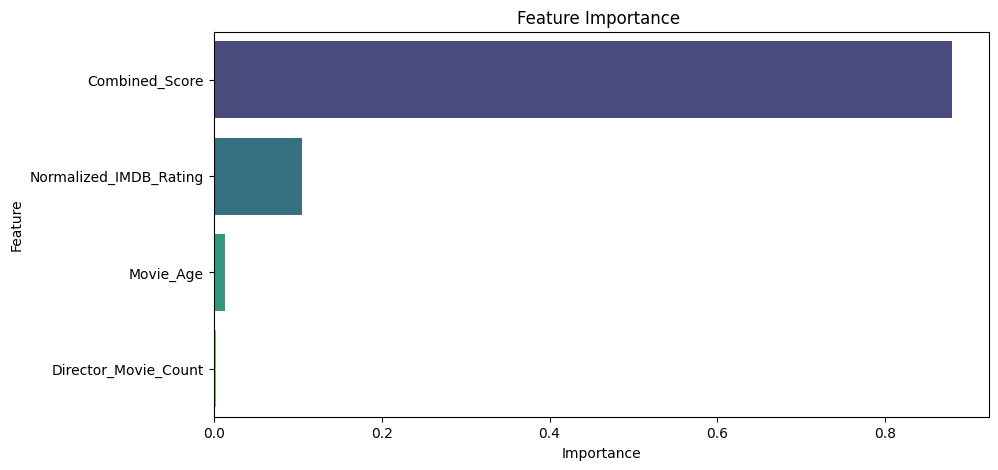

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Define features and target
X = df[["Normalized_IMDB_Rating", "Combined_Score", 
        "Movie_Age", "Director_Movie_Count"]]
y = df["Meta_score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df["Importance"], 
            y=feature_importance_df["Feature"], 
            hue=feature_importance_df["Feature"],  # Assign hue
            palette="viridis", 
            legend=False) 
plt.title("Feature Importance ")
plt.show()


# Part 2: Extracting & Visualizing Insights

# 📊1 Why this chart?

- A line chart is best for showing trends over time. This helps us see whether movies are earning more money as years go by.
- 
🔍 Insight:
- The movie which made the least amount of money happen to be acttually after 2000
  
- Movies today make way more money than old classics, but does that mean they're better? Maybe inflation is playing tricks on us.

- I consider that this vizualiztion is necessary because using it we can see the best and the worst cinematographic years in terms of financial and also the variation of the income over the years

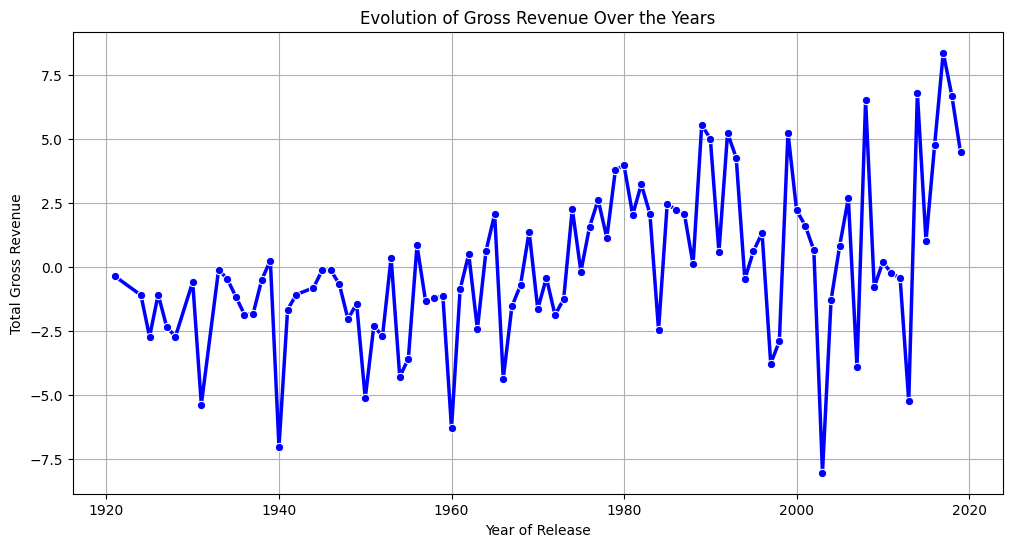

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gross_by_year = df.groupby('Released_Year')['Gross'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=gross_by_year, x='Released_Year', y='Gross', marker='o', linewidth=2.5, color='b')
plt.xlabel("Year of Release")
plt.ylabel("Total Gross Revenue")
plt.title("Evolution of Gross Revenue Over the Years")
plt.grid(True)
plt.show()

# 📊2 Why this chart?

- A bar chart makes it easy to compare counts, helping us see which actors dominate the movie industry over the years.

- I choose to plot this visualization cause i was interested whis is the actor whic played in the most of the movies

🔍 Insight:
Some actors just refuse to leave our screens! Are they that good, or did Hollywood sign a secret lifetime contract with them? 😆

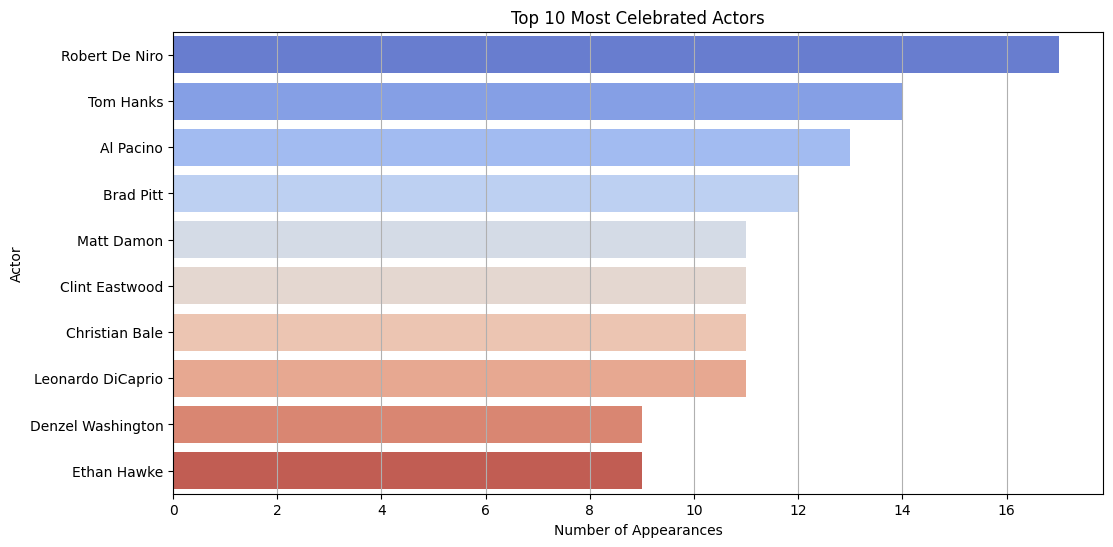

In [31]:
# Count actor appearances in Star1, Star2, Star3, and Star4 columns
actor_counts = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']]).value_counts().head(10)

# Plot the top 10 most celebrated actors
plt.figure(figsize=(12, 6))
sns.barplot(x=actor_counts.values, y=actor_counts.index, hue=actor_counts.index, palette='coolwarm', legend=False)
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.title("Top 10 Most Celebrated Actors")
plt.grid(axis='x')
plt.show()

# 📊3 Why this chart?

  - Oldest Films in the Dataset (Column Chart)
    
  - A column chart visually highlights the oldest movies and makes their age feel massive.

  - When i choose to plot this visualization i was wondering whic was actually the oldest film in the dataset and later in the dataset plots we'll see some of them again, as bad or good movies 

🔍 Insight:
  - These movies have been around longer than most of us!  🎬🕰️

C:\Users\Pop Paul\AppData\Local\Temp\ipykernel_28076\4005878665.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Series_Title', y='Movie_Age', data=oldest_movies, palette='magma')
C:\Users\Pop Paul\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


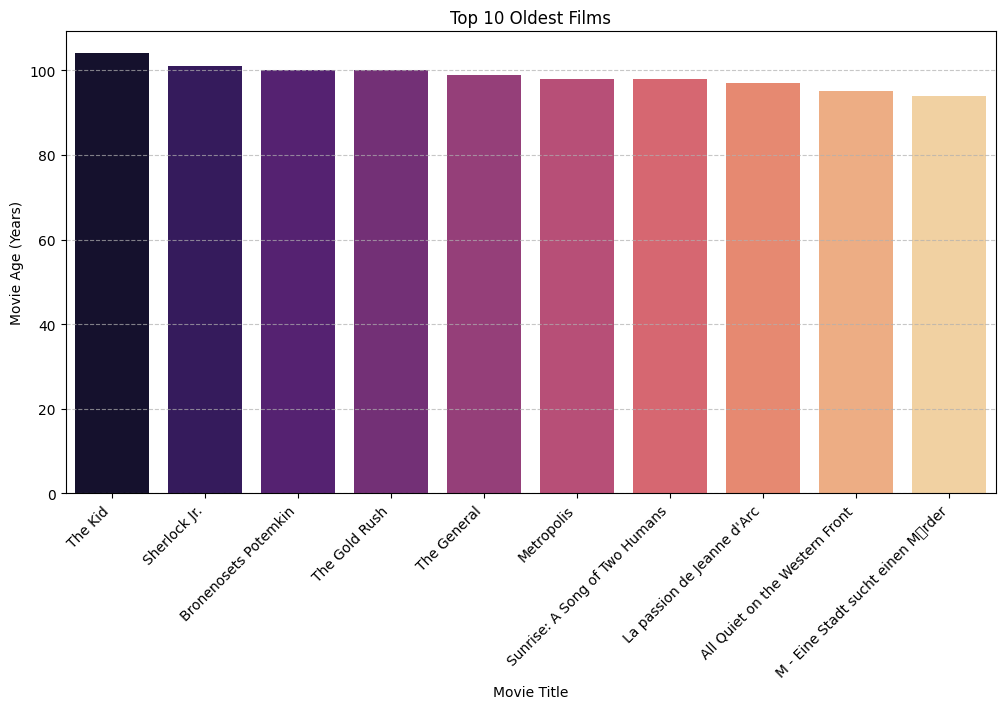

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort movies by age and take the top 10 oldest ones
oldest_movies = df.sort_values(by="Movie_Age", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Series_Title', y='Movie_Age', data=oldest_movies, palette='magma')

# Labels and title
plt.xlabel("Movie Title")
plt.ylabel("Movie Age (Years)")
plt.title("Top 10 Oldest Films")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# 📊4 Why this chart?
- A histogram helps us see how IMDb ratings are spread—are most movies highly rated, or are we watching a lot of flops?
  
- We can see most of the movies are good on the imbd category and the movies between 1990 and 2000 seem to be only 5 AS WE SAW IN THE OUTLINES FOR
IMDB_Ratings when we were at the data preprocesing spot- Excellent movies over the years for those the IMBD_Rating is over 9.

- If we make a comparation between Meta_score over the years and IMDB_Rating over the years we can see that the critics who established Meta_score and the users who voted for IMDB appreciated more the old movies than the new ones.

- We can also see that the worst year in cinema w.r.t Meta_score was 1965 and the worst year in cinema w.r.t IMDB was 1953

- 

<Figure size 1000x600 with 0 Axes>

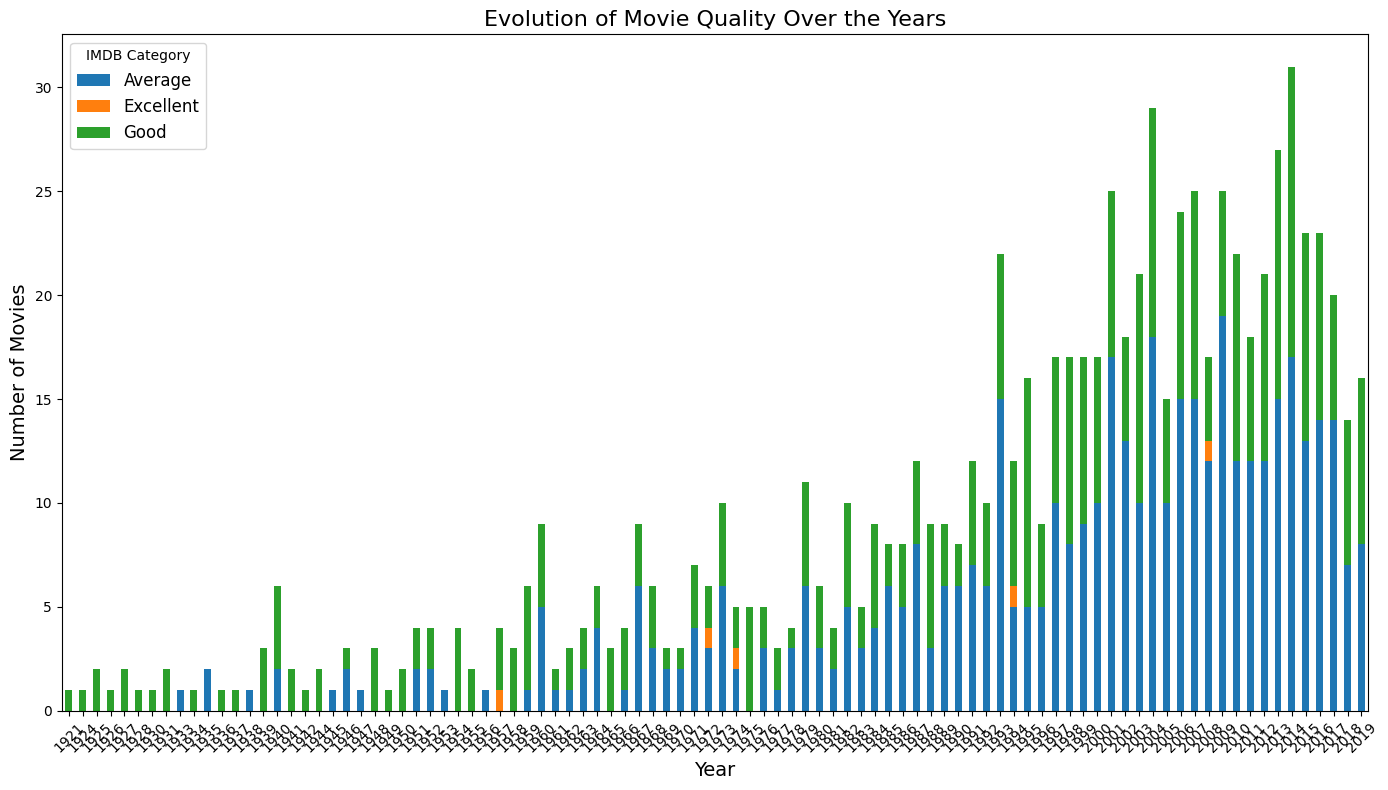

In [33]:
category_by_year = df.groupby(['Released_Year', 'IMDB_Category']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
category_by_year.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Evolution of Movie Quality Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.legend(title='IMDB Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

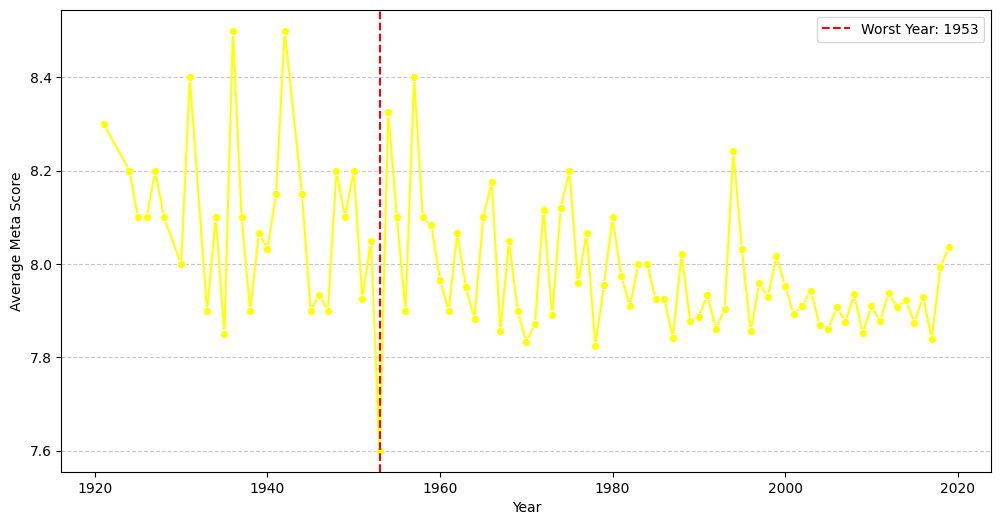

In [35]:
# Group by year and compute the average Meta Score
meta_score_trend = df.groupby('Released_Year')['IMDB_Rating'].mean()

# Find the year with the lowest average Meta Score
worst_year = meta_score_trend.idxmin()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=meta_score_trend.index, y=meta_score_trend.values, marker='o', color='yellow')
plt.axvline(x=worst_year, color='red', linestyle='--', label=f"Worst Year: {worst_year}")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Meta Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

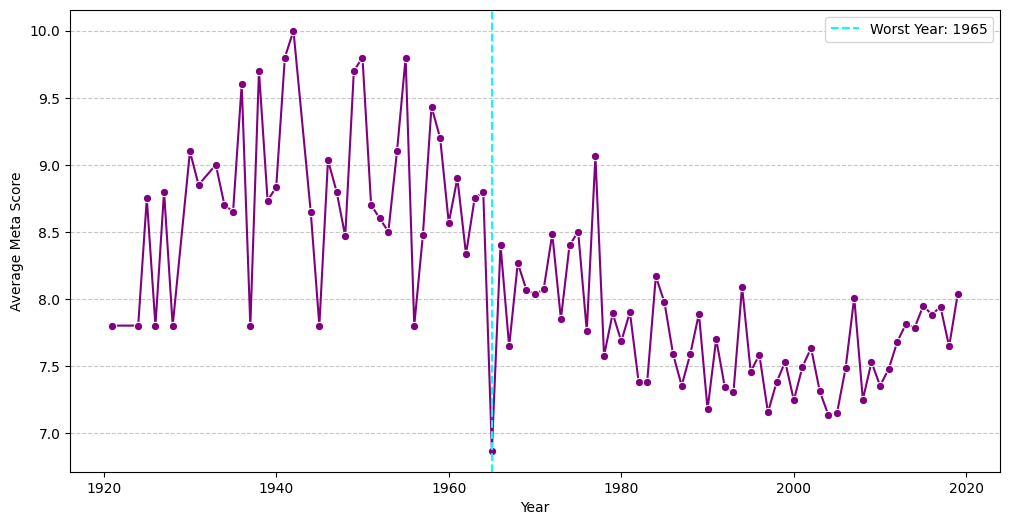

In [34]:
# Group by year and compute the average Meta Score
meta_score_trend = df.groupby('Released_Year')['Meta_score'].mean()

# Find the year with the lowest average Meta Score
worst_year = meta_score_trend.idxmin()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=meta_score_trend.index, y=meta_score_trend.values, marker='o', color='purple')
plt.axvline(x=worst_year, color='cyan', linestyle='--', label=f"Worst Year: {worst_year}")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Meta Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# 📊5 Why this chart?
- A heatmap shows which genres appear the most, helping us see what kinds of movies dominate.

- This scale of the genre help us see which is the movie genre prefered by most of the peoples

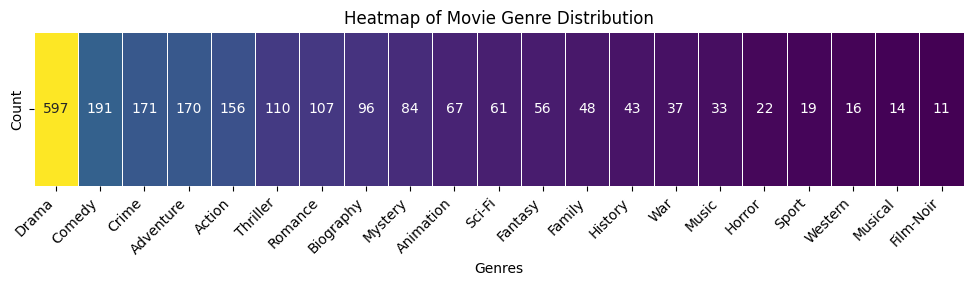

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 
                 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 
                 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# Count occurrences of each genre
genre_counts = df[genre_columns].sum().sort_values(ascending=False)

# Convert to DataFrame for heatmap
genre_df = pd.DataFrame(genre_counts, columns=['Count']).T

# Plot heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(genre_df, cmap='viridis', annot=True, fmt='g', linewidths=0.5, cbar=False)

plt.xlabel("Genres")
plt.title("Heatmap of Movie Genre Distribution")
plt.xticks(rotation=45, ha="right")
plt.show()


# 📊6 Why this chart? 
- A scatter plot is useful when dealing with discrete categories on one axis (directors) and continuous values on another (ratings). It is an alternative when we want to focus on individual data points rather than cumulative values.

- Doing this plot i was wondering which is the best movie director and how the number of the movies for each director affect or not the scale

 Insights conveyed:

 - After we plot those two tables we can see that even if some of the director have like double number of movies than the others the quality of the movies can be better for the ones with not that many movies, we can see that Christopher Nolan ehic had 8 movies is the first with respect to IMDB_Rating even if the don't have as many movies as Steven Spielberg for example.



C:\Users\Pop Paul\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


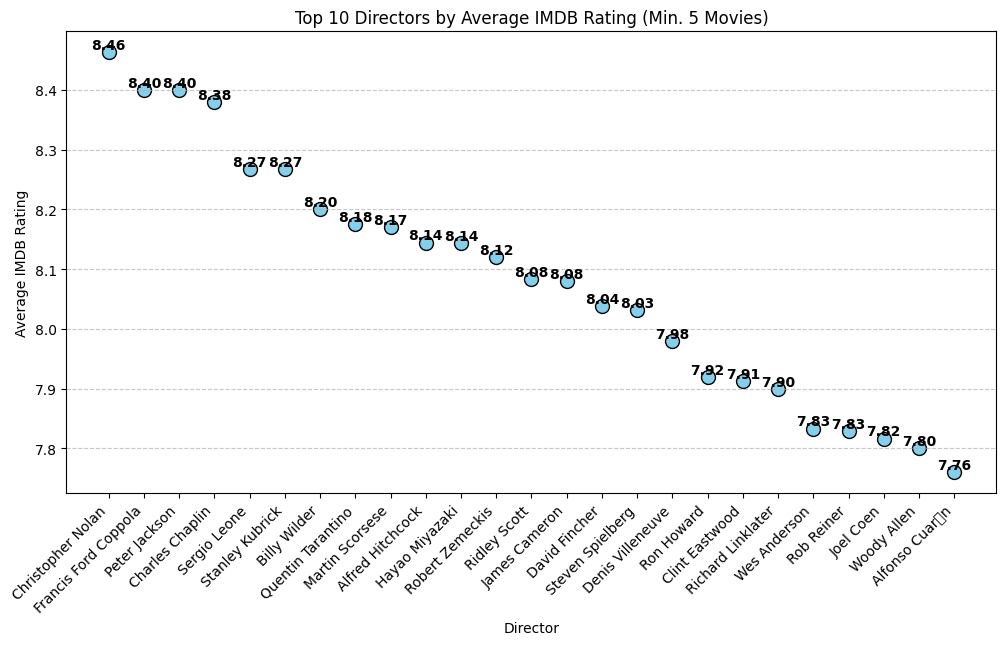

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter directors with at least 5 movies
filtered_df = df[df["Director_Movie_Count"] >= 5]

# Calculate the average IMDB rating for each director
sorted_directors = (
    filtered_df.groupby("Director")["IMDB_Rating"]
    .mean()
    .sort_values(ascending=False)
)

# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(sorted_directors.index, sorted_directors.values, color="skyblue", edgecolors="black", s=100)

# Labels and title
plt.xlabel("Director")
plt.ylabel("Average IMDB Rating")
plt.title("Top 10 Directors by Average IMDB Rating (Min. 5 Movies)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on the points
for i, txt in enumerate(sorted_directors.values):
    plt.text(sorted_directors.index[i], sorted_directors.values[i], f"{txt:.2f}", 
             ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.show()


C:\Users\Pop Paul\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


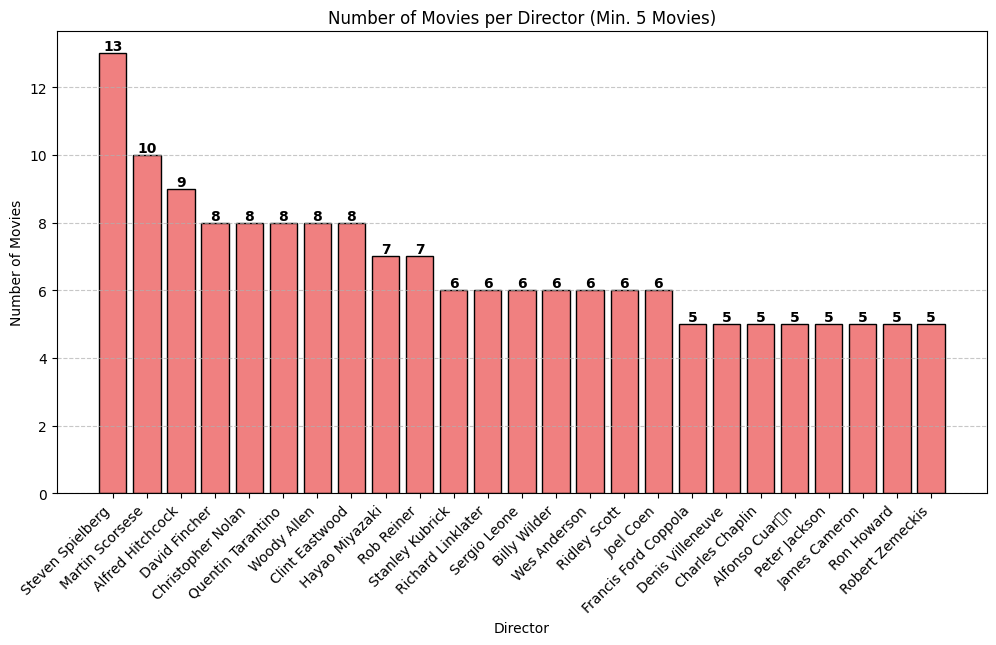

In [140]:
import matplotlib.pyplot as plt

# Sort directors by movie count (only those with at least 5 movies)
sorted_director_counts = df[df["Director_Movie_Count"] >= 5].groupby("Director")["Director_Movie_Count"].max().sort_values(ascending=False)

# Bar plot for movie counts
plt.figure(figsize=(12, 6))
plt.bar(sorted_director_counts.index, sorted_director_counts.values, color="lightcoral", edgecolor="black")

# Labels and title
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Director (Min. 5 Movies)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on the bars
for i, count in enumerate(sorted_director_counts.values):
    plt.text(i, count, str(count), ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.show()


# 📊7 Why this chart?
 - Scatter Plot: Show the relationship between IMDB_Rating and Meta_score, with the Combined_Score encoded using color (a heatmap-like effect).
 - Shows the correlation between IMDB_Rating and Meta_score.
 - The color indicates the Combined_Score, making it easy to spot high-quality movies.
 - Outliers (high IMDB but low Meta Score or vice versa) become visible.

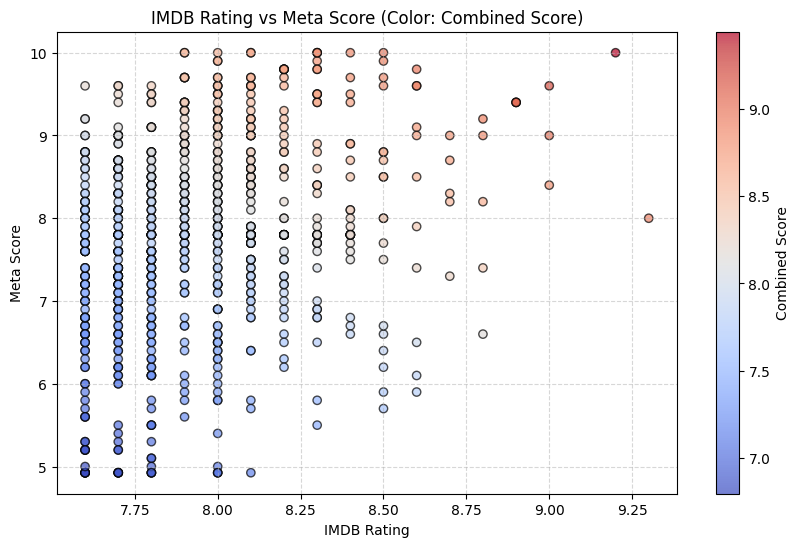

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['IMDB_Rating'], df['Meta_score'], c=df['Combined_Score'], cmap='coolwarm', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("IMDB Rating")
plt.ylabel("Meta Score")
plt.title("IMDB Rating vs Meta Score (Color: Combined Score)")
plt.colorbar(scatter, label="Combined Score")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


- As we can see in the histogram the Combined Score of most of the movies tend to values 8

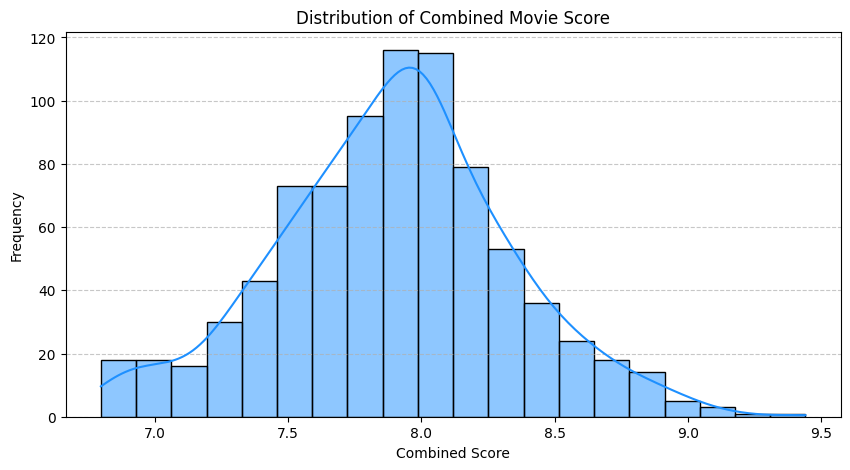

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Combined_Score'], bins=20, kde=True, color='dodgerblue', edgecolor='black')

# Labels and title
plt.xlabel("Combined Score")
plt.ylabel("Frequency")
plt.title("Distribution of Combined Movie Score")
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


# 📊8 Why this chart?
- The chosen visualization for this analysis is a bar plot that presents the top 10 actors based on their average Meta Score across the movies they've appeared in (THE NUMBER OF MOVIES CAN BE CHANGED MANNUALY), with a focus on highlighting the best actors (actors with the highest average Meta Scores). Here's the reasoning behind the choice and how it conveys insights:
  
- Actor Performance: The bar plot immediately shows which actors have appeared in movies with higher or lower ratings (on average). High bars represent actors who are associated with films rated highly by critics (Meta Score), and shorter bars represent those whose films have lower ratings.

- Top Performers: The top 10 actors in terms of Meta Score help us understand which actors are frequently involved in well-rated movies. This could be useful for film studios, casting agents, or anyone interested in identifying actors with a history of successful collaborations in high-quality films.

- We can also see that if we change the number of movies the top 10 can change

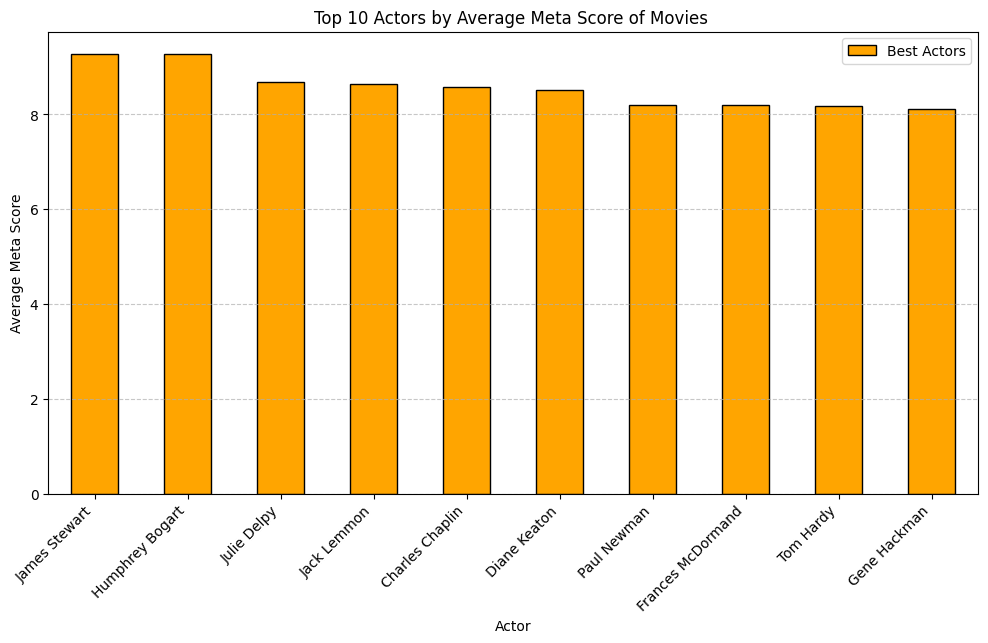

In [39]:
# Melt the dataset to stack actor columns into a single column
actor_columns = ['Star1', 'Star2', 'Star3', 'Star4']  # Assuming these are the actor columns
df_actors = df.melt(id_vars=['Series_Title', 'Meta_score'], value_vars=actor_columns, 
                    var_name='Actor_Position', value_name='Actor')

actor_avg_meta_score = df_actors.groupby("Actor")["Meta_score"].mean()

# Filter out actors with fewer than a certain number of movies (optional)
min_movies = 5  # You can adjust this threshold as needed
actor_movie_count = df_actors["Actor"].value_counts()
top_actors = actor_movie_count[actor_movie_count >= min_movies].index

# Filter the actors based on the minimum movie count
filtered_actor_avg_meta_score = actor_avg_meta_score[top_actors]

# Sort by average Meta Score to find the best and "badass" actors
sorted_actors = filtered_actor_avg_meta_score.sort_values(ascending=False)

# Get the top 10 best actors
best_actors = sorted_actors.head(10)

# Plot the top 10 best actors by average Meta Score
plt.figure(figsize=(12, 6))
best_actors.plot(kind="bar", color="ORANGE", edgecolor="black", label="Best Actors")

# Adding labels and title
plt.xlabel("Actor")
plt.ylabel("Average Meta Score")
plt.title("Top 10 Actors by Average Meta Score of Movies ")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# 📊9 Why this chart?

- I choose to plot those information cause i wanted to see which is the perception of users and experts with respect to movies over the years and to see which movies win on the both sides.

- Looking at the plots we did, we can see that the experts and the users didn't manage to be on the same ooint on all the decades with respect to the best movies 


- The most low rated movies over the decades w.r.t the Meta_score

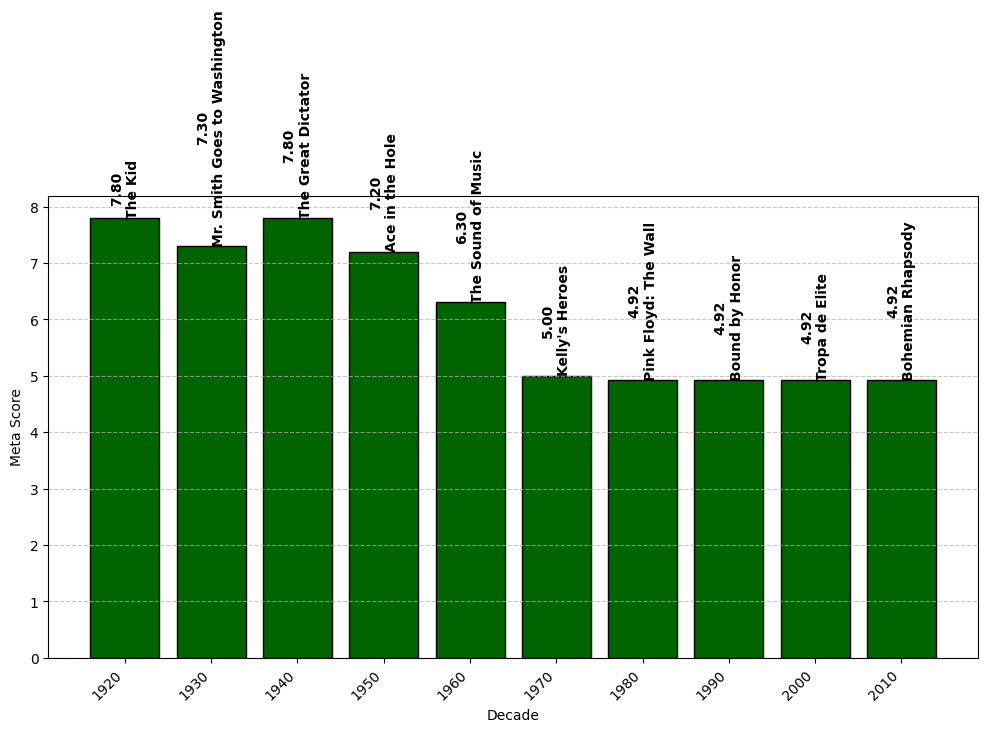

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove rows with missing data (if any)
df = df.dropna(subset=['Meta_score', 'Released_Year', 'Series_Title'])

# Create a new column for the decade
df['Decade'] = (df['Released_Year'] // 10) * 10

# Find the "badass film" for each decade based on the lowest Meta Score
top_badass_per_decade_meta = df.loc[df.groupby('Decade')['Meta_score'].idxmin()]

# Plot the top badass film for each decade based on Meta Score
plt.figure(figsize=(12, 6))

# Bar plot of the top "badass films" for each decade based on Meta Score
plt.bar(top_badass_per_decade_meta['Decade'].astype(str), top_badass_per_decade_meta['Meta_score'], color="darkgreen", edgecolor="black")

# Labels and title
plt.xlabel("Decade")
plt.ylabel("Meta Score")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on the bars and movie names (with perpendicular rotation)
for i, (score, movie) in enumerate(zip(top_badass_per_decade_meta['Meta_score'], top_badass_per_decade_meta['Series_Title'])):
    plt.text(i, score, f"{score:.2f}\n{movie}", ha="center", va="bottom", fontsize=10, fontweight="bold", rotation=90)

plt.show()


- The most high rated movies over the decades w.r.t the Meta_score

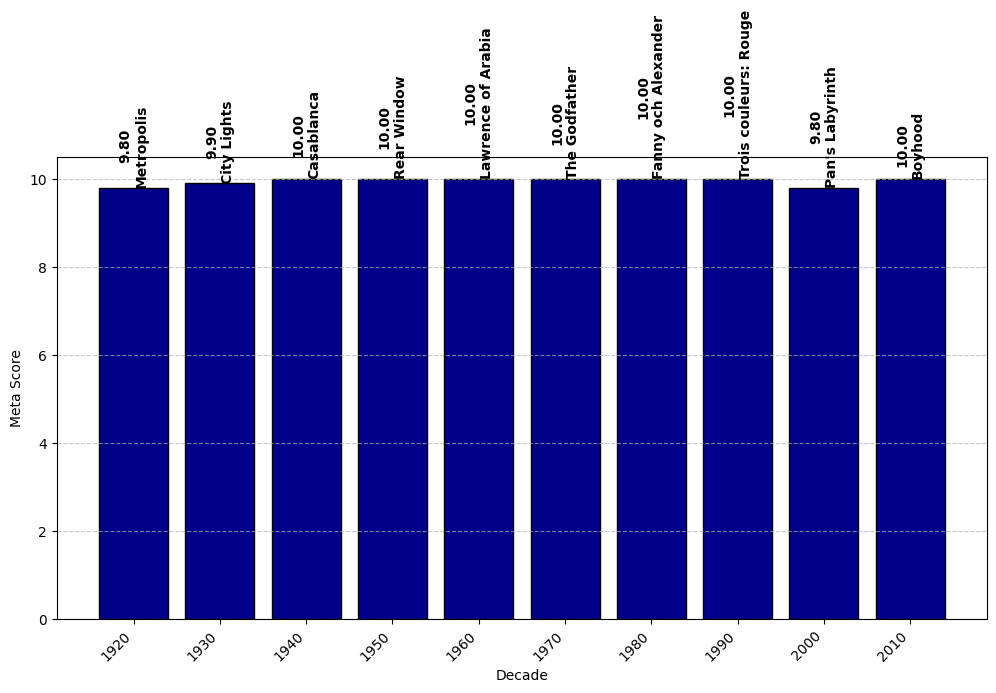

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove rows with missing data (if any)
df = df.dropna(subset=['Meta_score', 'Released_Year', 'Series_Title'])

# Create a new column for the decade
df['Decade'] = (df['Released_Year'] // 10) * 10

# Find the "best film" for each decade based on the highest Meta Score
top_best_per_decade_meta = df.loc[df.groupby('Decade')['Meta_score'].idxmax()]

# Plot the top best film for each decade based on Meta Score
plt.figure(figsize=(12, 6))

# Bar plot of the top "best films" for each decade based on Meta Score
plt.bar(top_best_per_decade_meta['Decade'].astype(str), top_best_per_decade_meta['Meta_score'], color="darkblue", edgecolor="black")

# Labels and title
plt.xlabel("Decade")
plt.ylabel("Meta Score")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on the bars and movie names (with perpendicular rotation)
for i, (score, movie) in enumerate(zip(top_best_per_decade_meta['Meta_score'], top_best_per_decade_meta['Series_Title'])):
    plt.text(i, score, f"{score:.2f}\n{movie}", ha="center", va="bottom", fontsize=10, fontweight="bold", rotation=90)

plt.show()


- The most high rated movies over the decades w.r.t the IMDB_Rating

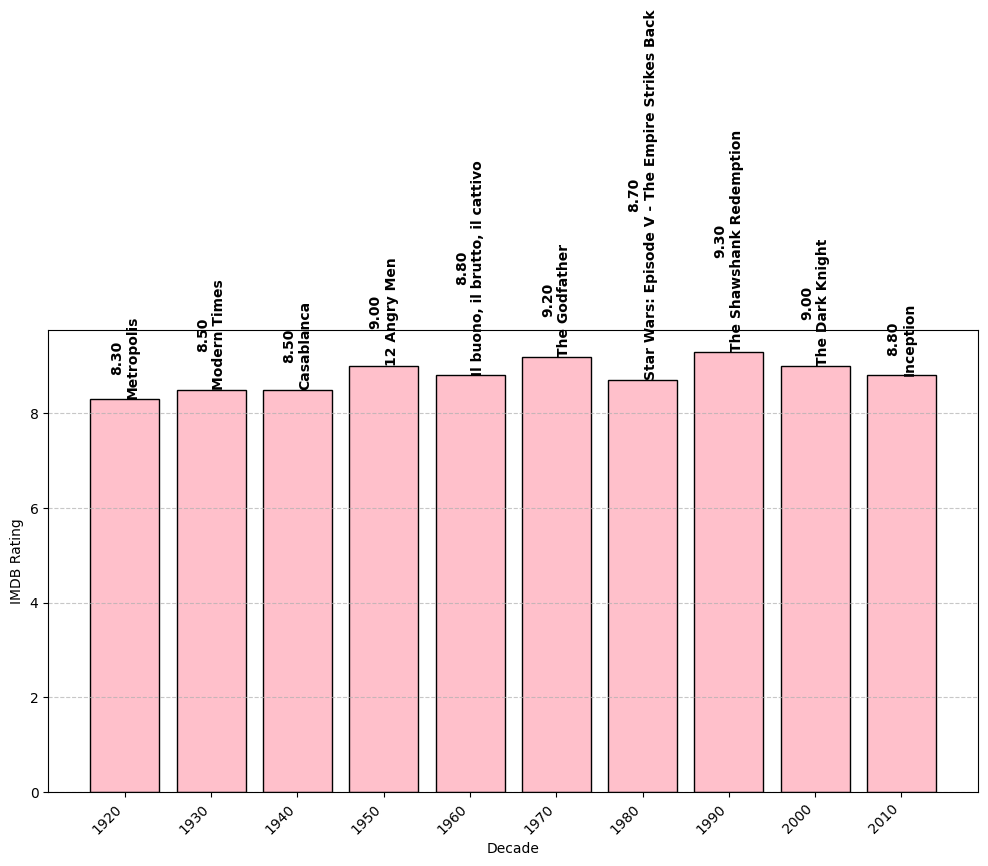

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove rows with missing data (if any)
df = df.dropna(subset=['IMDB_Rating', 'Released_Year', 'Series_Title'])

# Create a new column for the decade
df['Decade'] = (df['Released_Year'] // 10) * 10

# Find the "best film" for each decade based on the highest IMDB Rating
top_best_per_decade_imdb = df.loc[df.groupby('Decade')['IMDB_Rating'].idxmax()]

# Plot the top best film for each decade based on IMDB Rating
plt.figure(figsize=(12, 6))

# Bar plot of the top "best films" for each decade based on IMDB Rating
plt.bar(top_best_per_decade_imdb['Decade'].astype(str), top_best_per_decade_imdb['IMDB_Rating'], color="pink", edgecolor="black")

# Labels and title
plt.xlabel("Decade")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on the bars and movie names (with perpendicular rotation)
for i, (rating, movie) in enumerate(zip(top_best_per_decade_imdb['IMDB_Rating'], top_best_per_decade_imdb['Series_Title'])):
    plt.text(i, rating, f"{rating:.2f}\n{movie}", ha="center", va="bottom", fontsize=10, fontweight="bold", rotation=90)

plt.show()


- The most low rated movies over the decades w.r.t the IMDB_Rating

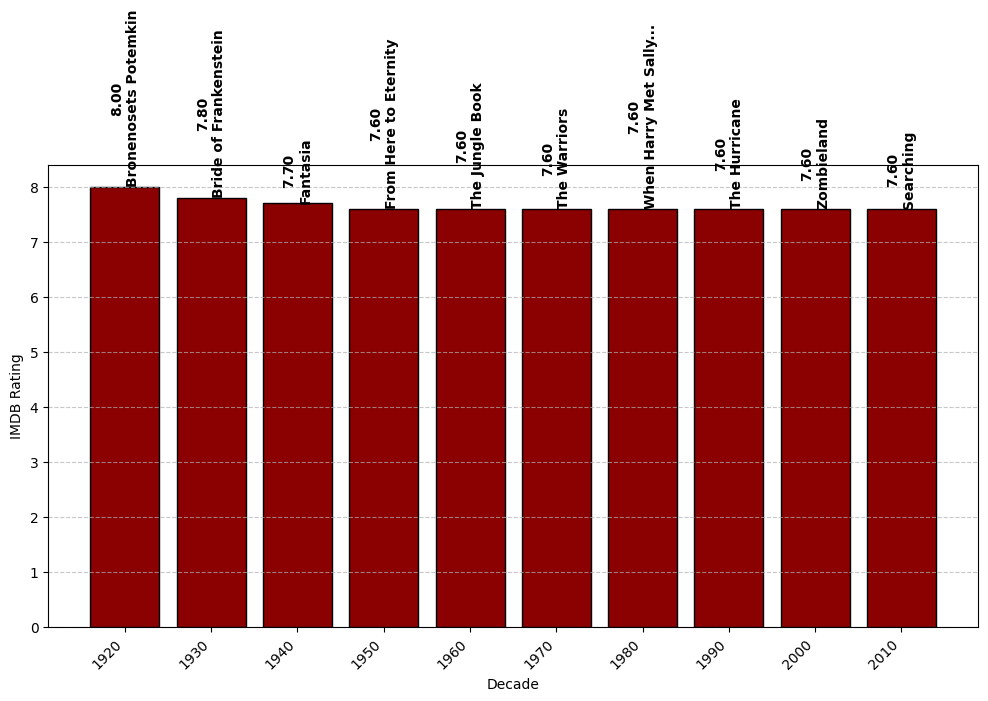

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove rows with missing data (if any)
df = df.dropna(subset=['IMDB_Rating', 'Released_Year', 'Series_Title'])

# Create a new column for the decade
df['Decade'] = (df['Released_Year'] // 10) * 10

# Find the "worst film" for each decade based on the lowest IMDB Rating
top_worst_per_decade_imdb = df.loc[df.groupby('Decade')['IMDB_Rating'].idxmin()]

# Plot the worst film for each decade based on IMDB Rating
plt.figure(figsize=(12, 6))

# Bar plot of the worst "films" for each decade based on IMDB Rating
plt.bar(top_worst_per_decade_imdb['Decade'].astype(str), top_worst_per_decade_imdb['IMDB_Rating'], color="darkred", edgecolor="black")

# Labels and title
plt.xlabel("Decade")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on the bars and movie names (with perpendicular rotation)
for i, (rating, movie) in enumerate(zip(top_worst_per_decade_imdb['IMDB_Rating'], top_worst_per_decade_imdb['Series_Title'])):
    plt.text(i, rating, f"{rating:.2f}\n{movie}", ha="center", va="bottom", fontsize=10, fontweight="bold", rotation=90)

plt.show()


# 📊10 Why this chart?

- Justification for Each Visualization
  
  - Scatterplots (Lower Triangle of the Pairplot)
    
     - These visualize the relationships between two numerical variables.
       
        - Example Insight:
          
              - The IMDB Rating vs. Combined Score scatterplot suggests a strong positive correlation, meaning higher IMDB ratings generally lead to higher combined scores.
              - Meta Score vs. Combined Score shows a linear trend, implying that the meta score contributes significantly to the combined score.

          
  - Histograms (Diagonal Plots)

    - These display the distribution of individual variables.
      
       - Example Insight:
         
             - The IMDB Rating histogram shows that most ratings are clustered between 7.5 and 9.5, suggesting that only well-rated movies are included in the dataset.
             - The Meta Score histogram is more spread out, indicating more variation in critic scores.
             - The Combined Score histogram is relatively normal, showing that it is well-balanced.

         
🔍 Key Insights from the Graph

- Strong correlation between Meta Score and Combined Score

- The scatterplot shows a linear trend, meaning the combined score is heavily influenced by the meta score.

- IMDB Rating vs. Meta Score has some variability :While there’s a positive correlation, there is some spread, suggesting that user ratings (IMDB) and critic ratings (Meta Score) do not always agree.

- There are no isolated points far from the clusters, meaning the dataset is fairly clean without major anomalies.

🔥 Final Takeaway
This visualization helps confirm that Meta Score and IMDB Rating together determine the Combined Score while showing slight differences in critic and audience preferences.











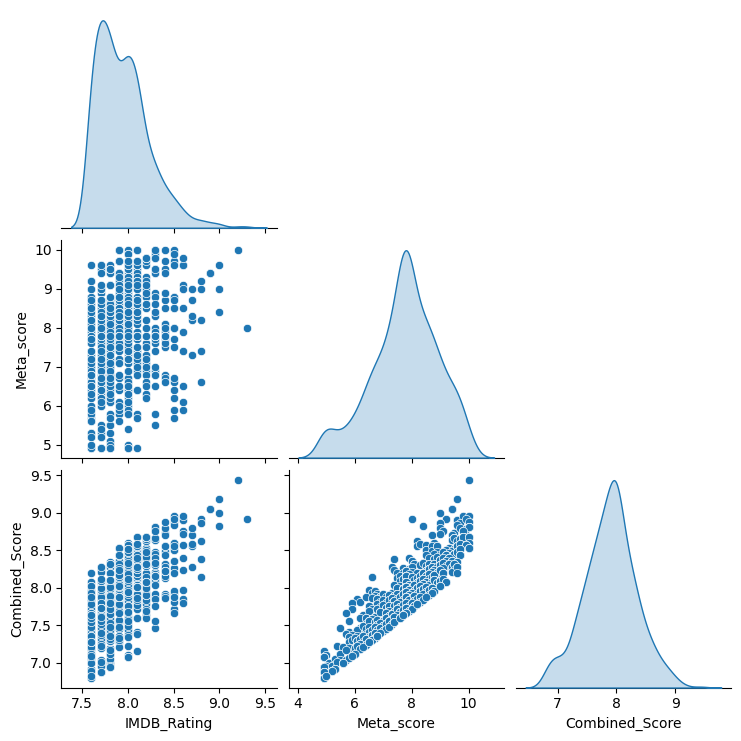

In [45]:
 # Select numerical features for correlation analysis
features = ['IMDB_Rating', 'Meta_score', 'Combined_Score']

# Pair plot
sns.pairplot(df[features], diag_kind='kde', corner=True)

# Show the plot
plt.show()

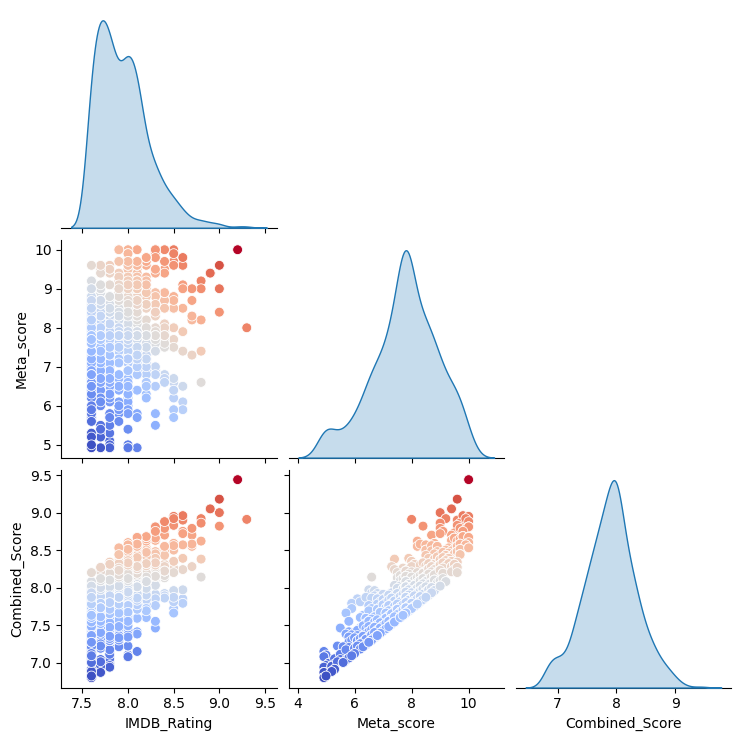

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Combined_Score' column exists in your dataframe

# Normalize the feature values for coloring (e.g., use 'Combined_Score' or another feature)
df['color_feature'] = df['Combined_Score']  # Or 'IMDB_Rating' or 'Meta_score'

# Create the pairplot with color map for continuous feature
sns.pairplot(df[features], diag_kind='kde', corner=True, 
             plot_kws={'s': 50, 'c': df['color_feature'], 'cmap': 'coolwarm'})  # or any cmap of your choice

# Show the plot
plt.show()


In [47]:
df.to_csv("movies_dataset.csv", index=False)

In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 
                 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 
                 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# Function to calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

def recommend_movies(movie_title, df):
    if movie_title not in df['Series_Title'].values:
        return "Movie not found in dataset."
    
    # Extract movie details
    movie = df[df['Series_Title'] == movie_title].iloc[0]
    movie_actors = {movie['Star1'], movie['Star2'], movie['Star3'], movie['Star4']}
    
    #  Correct genre extraction
    movie_genres = set(df.loc[df['Series_Title'] == movie_title, genre_columns].iloc[0][df.loc[df['Series_Title'] == movie_title, genre_columns].iloc[0] == 1].index)
    
    movie_overview = movie['Overview']
    movie_year = movie['Released_Year']
    movie_certificate = movie['Certificate']
    
    # Compute TF-IDF similarity for all overviews
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['Overview'].fillna(''))  # Handle missing overviews
    overview_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

    similarities = []
    
    for idx, row in df.iterrows():
        if row['Series_Title'] == movie_title:
            continue
        
        # Actor similarity
        row_actors = {row['Star1'], row['Star2'], row['Star3'], row['Star4']}
        actor_sim = jaccard_similarity(movie_actors, row_actors)
        
        # FIX: Correct genre extraction for each row
        row_genres = set(df.loc[idx, genre_columns][df.loc[idx, genre_columns] == 1].index)
        genre_sim = jaccard_similarity(movie_genres, row_genres)
        
        # Overview similarity (precomputed)
        overview_sim = overview_similarities[df.index[df['Series_Title'] == movie_title][0], idx]

        # Certificate similarity
        certificate_sim = 1 if movie_certificate == row['Certificate'] else 0
        
        # Year similarity (normalized)
        year_sim = 1 - abs(movie_year - row['Released_Year']) / 100 if pd.notna(row['Released_Year']) else 0
        
        # Weighted sum of all similarities
        total_similarity = (0.2 * actor_sim + 0.3 * genre_sim + 0.25 * overview_sim +
                            0.15 * year_sim + 0.1 * certificate_sim)
        
        similarities.append((row['Series_Title'], total_similarity))
    
    # Sort and return Top 5 most similar movies
    similarities.sort(key=lambda x: x[1], reverse=True)
    return [title for title, _ in similarities[:5]]

# Example usage
print(recommend_movies("The Godfather: Part III", df))


['The Godfather: Part II', 'The Godfather', 'Scarface', 'Boyz n the Hood', 'Once Were Warriors']


# 🎬 Movie Recommendation System (Without AI)

# 🔍 Feature Extraction

To compare movies, we extract the following key features from each movie in the dataset:

1️⃣ Actors – The main actors in the movie (Star1, Star2, Star3, Star4).

2️⃣ Genres – The movie’s genre(s) represented as binary values (e.g., Action = 1, Comedy = 0).

3️⃣ Overview – A textual summary of the movie’s plot.

4️⃣ Release Year – The year the movie was released.

5️⃣ Certificate – The movie’s rating (e.g., PG-13, R, etc.).

These features form the basis for computing similarity between movies.

# 📊 Similarity Metrics

For each feature, we use a different similarity measure to quantify how alike two movies are:

1️⃣ Actor Similarity (Jaccard Similarity)

Actors are treated as sets, and we use the Jaccard Index to compute similarity.

Formula: J(A,B)=  ∣A∪B∣ / ∣A∩B∣ ,where A and 𝐵 are the sets of actors in two movies. A score of 1 means both movies have identical actors, and 0 means they have no actors in common.


2️⃣ Genre Similarity (Jaccard Similarity)

Since genres are one-hot encoded (binary values), we again use Jaccard Similarity.This metric ensures that movies with overlapping genres get a higher similarity score.

3️⃣ Overview Similarity (TF-IDF + Cosine Similarity)

The movie description (overview) is converted into a numerical vector using TF-IDF (Term Frequency-Inverse Document Frequency). Then, Cosine Similarity is applied to compare movie overviews.

Formula: cos(θ)= (A⋅B)/ ∣∣A∣∣*∣∣B∣∣ ,where A and 𝐵 are the TF-IDF vectors of two movies. A higher score means the movies have similar themes or storylines.

4️⃣ Certificate Similarity (Exact Match)

- Since movie ratings (e.g., PG-13, R) are categorical, we use a simple equality check: 1 if both movies have the same certificate, 0 otherwise.

- This ensures that movies with similar audience suitability are recommended together.

5️⃣ Year Similarity (Normalized Difference)

The absolute difference between release years is normalized: Similarity= 1− (|Year1 -Year2|/100)
 
This ensures that movies released around the same time period are considered more similar.

# 🎯 Finding the Top 5 Most Similar Movies

1️⃣ Compute the total similarity score for all movies (except the one being queried).

2️⃣ Sort the movies in descending order based on similarity.

3️⃣ Return the Top 5 most similar movies.

# 🔹 Why This Solution is Effective

✅ No Machine Learning Models Required :This approach only relies on feature similarity and does not require training an AI model.

✅ Content-Based & Explainable :Every similarity calculation is based on interpretable features (actors, genres, etc.). Users can understand why a movie is recommended.

✅ Balanced Feature Contribution: Uses a combination of categorical, textual, and numerical features for a comprehensive comparison.

✅ Efficient & Scalable

# 🧠 Logical Breakdown of the Recommendation Approach

The core logic behind this system is to compare movies based on key attributes that define their content. Instead of relying on user behavior (like AI/ML systems), it directly compares movie features to find similar ones.

This logic ensures that recommendations make sense, as movies are selected based on meaningful similarities rather than random correlations.

# 1️⃣ Why These Features?

- 🎭 Actor Similarity (20%): Why?

  - People often like movies with familiar actors. If two movies share the same lead cast, they are more likely to have similar styles, chemistry, and fan appeal.

     -- Example: If you liked The Godfather (starring Al Pacino, Marlon Brando), you might enjoy The Godfather :Part II (also starring Al Pacino)
     -- To do this we use Jaccard similarity on the set of actors for two movies. A high score means the movies share more cast members.

- 🎬 Genre Similarity (30%) – Highest Weight: Why?

  - People usually look for movies within the same genre (e.g., if you like Action movies, you're more likely to watch another Action movie). If a movie is both Action & Sci-Fi, it's much closer to another Action & Sci-Fi film than a Comedy.

  - Since genres are binary columns (1 if the movie belongs to a genre, 0 otherwise), we compare genre sets using Jaccard similarity. This checks how many genres overlap between two movies.
 
  - The highest weight because genre is the first thing people filter when choosing movies.
 
- 📜 Overview (Plot) Similarity (25%): Why?

  - Even within the same genre, movies can have different themes and storytelling styles.
    
     -- Example: Interstellar and Guardians of the Galaxy are both Sci-Fi, but one is a deep space drama while the other is a fun adventure.
 
  - This ensures we find movies with similar plot structures or themes.

- 📆 Release Year Similarity (15%)
Why?

  - Movies from different decades have different styles, cinematography, and cultural references.
    
  - A 1980s action movie feels very different from a 2020s action movie, even if the genre is the same.
 
  - Example: Die Hard (1988) and John Wick (2014) are both Action films, but their styles differ significantly due to their release eras.


- 📜 Certificate (Age Rating) Similarity (10%)

  - A G-rated family movie is very different from an R-rated thriller, even if they share actors or genres.
    
  - People often filter movies based on what is appropriate for their audience (e.g., parents looking for kids' movies).
 
  - If two movies have the same certificate, they get a similarity score of 1; otherwise, it's 0.

# 2️⃣ Why These Weights?

🔹 Genre (30%) → Most people choose movies by genre first.

🔹 Overview (25%) → Story similarity matters almost as much.

🔹 Actors (20%) → Having familiar faces makes a movie more attractive.

🔹 Year (15%) → Older movies can feel very different.

🔹 Certificate (10%) → Important for filtering but not a major similarity factor.

This balance ensures that no single factor dominates the recommendation, making it well-rounded and effective.

# 3️⃣ Why This Search Method Works

Our search process follows a logical and efficient structure:

1️⃣ Extract Features of the Input Movie → Identify its actors, genres, plot, year, and certificate.

2️⃣ Compare Against Every Other Movie → Calculate similarity scores for each feature.

3️⃣ Combine Scores Using Weighted Sum → Get a final similarity score.

4️⃣ Sort & Select the Top 5 Most Similar Movies → Show the best recommendations.


